In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, df):
        self.df = df
        self.n = df.shape[0]
        self.x = df.loc[:, df.columns!='y']
        self.d = len(self.x.columns)
        self.x.insert(0, 'x0', 1)
        self.y = df['y']
        self.W = np.array([0 for _ in range(self.d+1)])

    def display_attr(self):
        print(self.x)
        print(self.y)
        print(self.d)
        print(self.W)

    def build_model_classifier(self, plot=False):
        Wold = self.W
        n = self.n
        epochs = 0
        x = self.x
        y = self.y
        Wnew = None
        eta = 1

        print(f"The Learning Rate is {eta}")
        print(f"The initial Weights are {Wold}")

        while True:
            if epochs!=0:
                Wnew = Wold

            print(f"Running Epoch {epochs+1} ==", end='')
            for i in range(n):
                print("==", end='')
                x_vec = x.iloc[i]
                y_hat = 1 if Wold.T.dot(x_vec)>0 else 0
                y_true = y.iloc[i]

                if y_true==y_hat:
                    continue
                else:
                    Wu = Wold + (y_true-y_hat)*eta*np.array(x_vec)
                    Wold = Wu

            epochs += 1
            print("==>")
            print(f"Old Weights {Wold}")
            print(f"New Weights: {Wnew}")

            if plot:
                self.plot_graph(Wold)

            if (Wold==Wnew).all():
                break


        self.W = Wnew
        print(f"Normal Vector of Hyperplane = {self.W}")

    def build_model_regressor(self, plot=False):
        self.display_attr()

        Wold = self.W
        n = self.n
        epochs = 0
        x = self.x
        y = self.y
        Wnew = self.W
        eta = 0.001

        print(f"The Learning Rate is {eta}")
        print(f"The initial Weights are {Wold}")

        while True:
            if epochs!=0:
                Wold = Wnew

            TG = np.zeros(x.shape[1])

            print(f"Running Epoch {epochs+1} ==", end='')
            for i in range(n):
                print("==", end='')
                x_vec = x.iloc[i]
                y_hat = Wold.T.dot(x_vec)
                y_true = y.iloc[i]

                grad = (y_true-y_hat)*np.array(x_vec)
                TG += grad

            epochs += 1
            print("==>")
            print(f"Old Weights {Wold}")
            print(f"Total Grad {TG}")
            Wnew = Wold + eta*TG
            print(f"New Weights: {Wnew}")

            if plot:
                self.plot_graph(Wold)

            if np.allclose(Wold, Wnew):
                break

        self.W = Wnew

    def plot_graph(self, W):
        w0, w1, w2 = W
        x = self.x
        y = self.y
        x1 = np.linspace(-2, 2, 100)
        x2 = (-w0-w1*x1)/w2


        plt.scatter(x['x1'], x['x2'], c=y, cmap='coolwarm')
        plt.plot(x1, x2, '-r')
        plt.legend(['Datapoints', 'Hyperplane - (wTx = 0)'])
        plt.show()

In [3]:
or_df = pd.DataFrame({'x1':[0, 0, 1, 1], 'x2':[0, 1, 0, 1], 'y':[0, 1, 1, 1]})
and_df = pd.DataFrame({'x1':[0, 0, 1, 1], 'x2':[0, 1, 0, 1], 'y':[0, 0, 0, 1]})

In [4]:
p1 = Perceptron(or_df)
p2 = Perceptron(and_df)

In [5]:
p1.build_model_classifier()

The Learning Rate is 1
The initial Weights are [0 0 0]
Running Epoch 1 ============>
Old Weights [1 0 1]
New Weights: None
Running Epoch 2 ============>
Old Weights [1 1 1]
New Weights: [1 0 1]
Running Epoch 3 ============>
Old Weights [0 1 1]
New Weights: [1 1 1]
Running Epoch 4 ============>
Old Weights [0 1 1]
New Weights: [0 1 1]
Normal Vector of Hyperplane = [0 1 1]


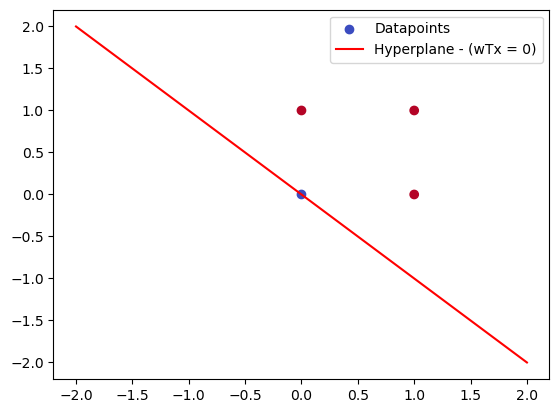

In [6]:
p1.plot_graph(p1.W)

In [7]:
p2.build_model_classifier()

The Learning Rate is 1
The initial Weights are [0 0 0]
Running Epoch 1 ============>
Old Weights [1 1 1]
New Weights: None
Running Epoch 2 ============>
Old Weights [0 2 1]
New Weights: [1 1 1]
Running Epoch 3 ============>
Old Weights [-1  2  1]
New Weights: [0 2 1]
Running Epoch 4 ============>
Old Weights [-1  2  2]
New Weights: [-1  2  1]
Running Epoch 5 ============>
Old Weights [-2  2  1]
New Weights: [-1  2  2]
Running Epoch 6 ============>
Old Weights [-2  2  1]
New Weights: [-2  2  1]
Normal Vector of Hyperplane = [-2  2  1]


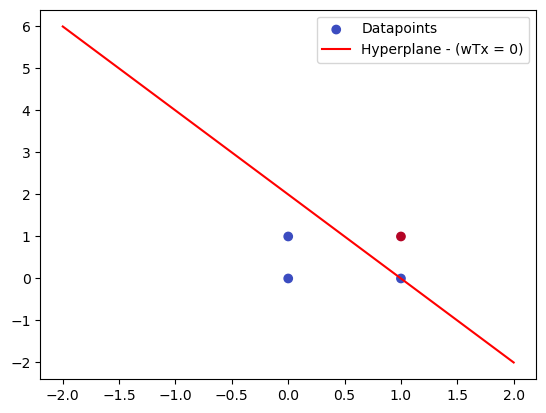

In [8]:
p2.plot_graph(p2.W)

The Learning Rate is 1
The initial Weights are [0 0 0]
Running Epoch 1 ============>
Old Weights [1 0 1]
New Weights: None


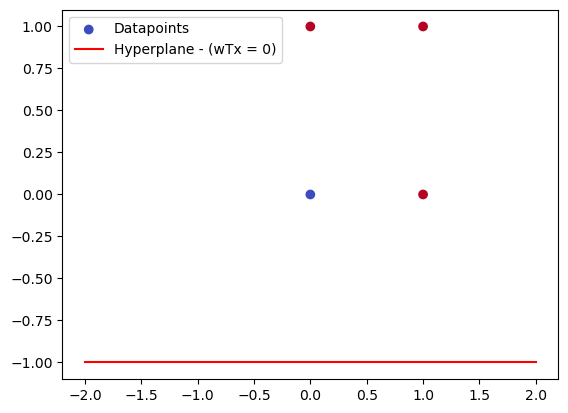

Running Epoch 2 ============>
Old Weights [1 1 1]
New Weights: [1 0 1]


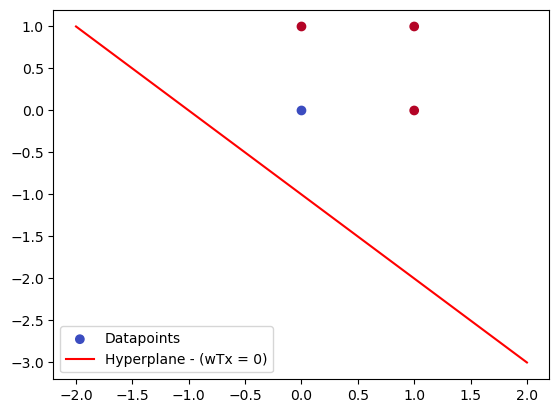

Running Epoch 3 ============>
Old Weights [0 1 1]
New Weights: [1 1 1]


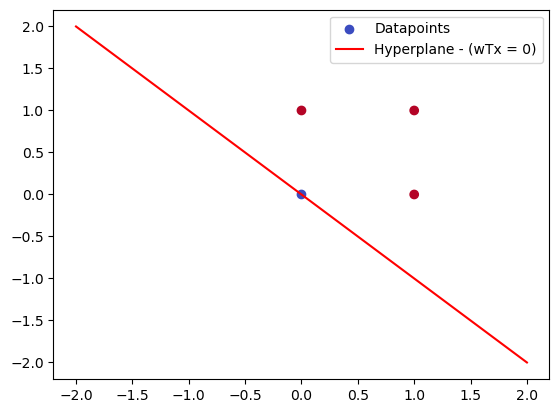

Running Epoch 4 ============>
Old Weights [0 1 1]
New Weights: [0 1 1]


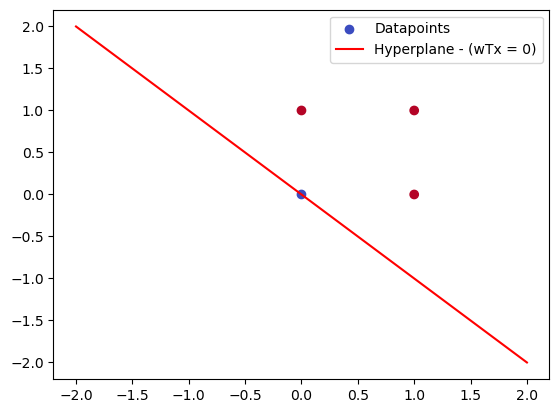

Normal Vector of Hyperplane = [0 1 1]


In [9]:
p3 = Perceptron(or_df)
p3.build_model_classifier(plot=True)

The Learning Rate is 1
The initial Weights are [0 0 0]
Running Epoch 1 ============>
Old Weights [1 1 1]
New Weights: None


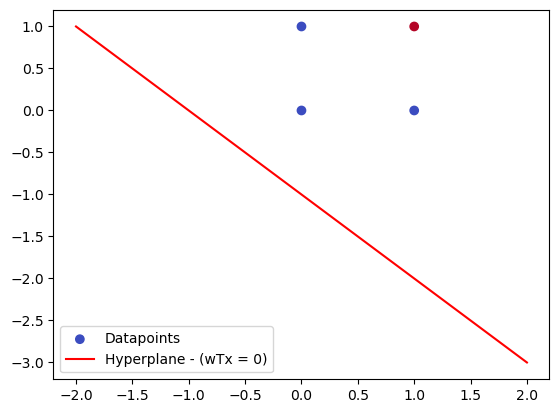

Running Epoch 2 ============>
Old Weights [0 2 1]
New Weights: [1 1 1]


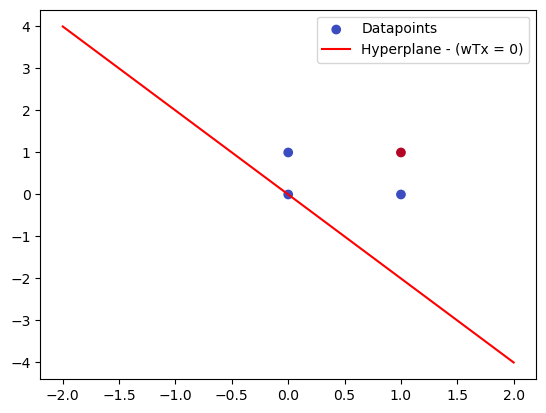

Running Epoch 3 ============>
Old Weights [-1  2  1]
New Weights: [0 2 1]


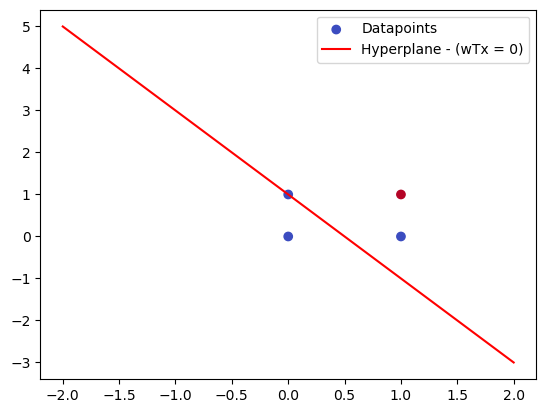

Running Epoch 4 ============>
Old Weights [-1  2  2]
New Weights: [-1  2  1]


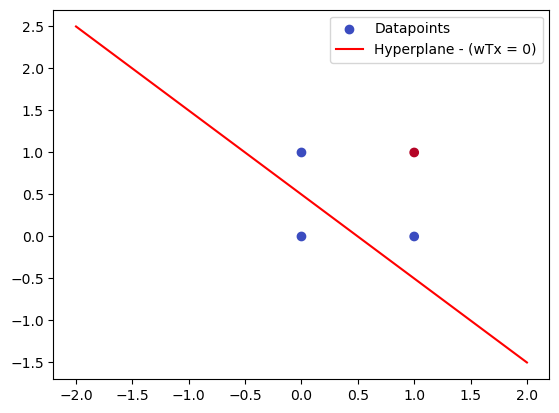

Running Epoch 5 ============>
Old Weights [-2  2  1]
New Weights: [-1  2  2]


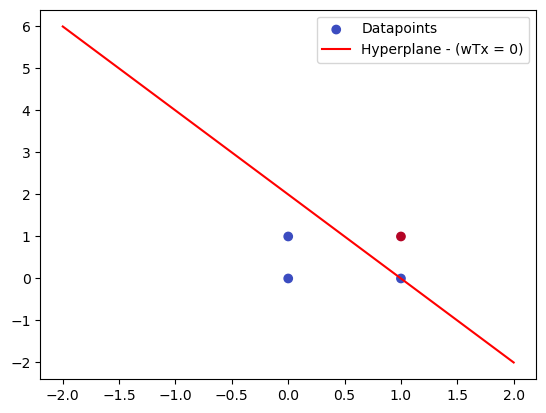

Running Epoch 6 ============>
Old Weights [-2  2  1]
New Weights: [-2  2  1]


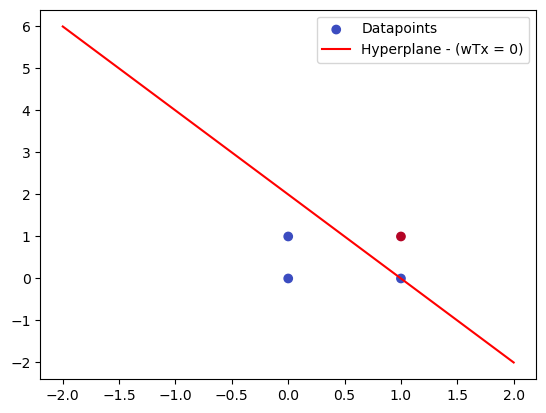

Normal Vector of Hyperplane = [-2  2  1]


In [10]:
p4 = Perceptron(and_df)
p4.build_model_classifier(plot=True)

In [11]:
# Construct a model using Perceptron on Soap-Sud Dataset.
# Do prediction using interpolation and extrapolation and calculate the measures like R^2 and MSE.
# Also, build a Simple Linear Regression model and compare the models using Perceptron and Simple Linear Regression using R^2 and MSE.

In [12]:
df = pd.DataFrame({'x1':[4, 4.5, 5, 5.5, 6, 6.5, 7.0], 'y':[33, 42, 45, 51, 53, 61, 62]})

In [13]:
p5 = Perceptron(df)

In [14]:
p5.build_model_regressor()

   x0   x1
0   1  4.0
1   1  4.5
2   1  5.0
3   1  5.5
4   1  6.0
5   1  6.5
6   1  7.0
0    33
1    42
2    45
3    51
4    53
5    61
6    62
Name: y, dtype: int64
1
[0 0]
The Learning Rate is 0.001
The initial Weights are [0 0]
Running Epoch 1 ==================>
Old Weights [0 0]
Total Grad [ 347. 1975.]
New Weights: [0.347 1.975]
Running Epoch 2 ==================>
Old Weights [0.347 1.975]
Total Grad [ 268.5335  1529.60925]
New Weights: [0.6155335  3.50460925]
Running Epoch 3 ==================>
Old Weights [0.6155335  3.50460925]
Total Grad [ 207.76380937 1184.66868681]
New Weights: [0.82329731 4.68927794]
Running Epoch 4 ==================>
Old Weights [0.82329731 4.68927794]
Total Grad [160.69971827 917.52350491]
New Weights: [0.98399703 5.60680144]
Running Epoch 5 ==================>
Old Weights [0.98399703 5.60680144]
Total Grad [124.2501653  710.62829906]
New Weights: [1.10824719 6.31742974]
Running Epoch 6 ==================>
Old Weights [1.10824719 6.31742974]
Total Grad 

Running Epoch 139 ==================>
Old Weights [1.41794891 8.77829562]
Total Grad [-0.89002377  0.15679992]
New Weights: [1.41705888 8.77845242]
Running Epoch 140 ==================>
Old Weights [1.41705888 8.77845242]
Total Grad [-0.8898304   0.15676585]
New Weights: [1.41616905 8.77860919]
Running Epoch 141 ==================>
Old Weights [1.41616905 8.77860919]
Total Grad [-0.88963707  0.15673179]
New Weights: [1.41527941 8.77876592]
Running Epoch 142 ==================>
Old Weights [1.41527941 8.77876592]
Total Grad [-0.88944379  0.15669774]
New Weights: [1.41438997 8.77892262]
Running Epoch 143 ==================>
Old Weights [1.41438997 8.77892262]
Total Grad [-0.88925054  0.15666369]
New Weights: [1.41350072 8.77907928]
Running Epoch 144 ==================>
Old Weights [1.41350072 8.77907928]
Total Grad [-0.88905734  0.15662966]
New Weights: [1.41261166 8.77923591]
Running Epoch 145 ==================>
Old Weights [1.41261166 8.77923591]
Total Grad [-0.88886418  0.15659563]
N

Running Epoch 253 ==================>
Old Weights [1.31772165 8.79595316]
Total Grad [-0.86824806  0.15296358]
New Weights: [1.3168534  8.79610612]
Running Epoch 254 ==================>
Old Weights [1.3168534  8.79610612]
Total Grad [-0.86805942  0.15293035]
New Weights: [1.31598534 8.79625905]
Running Epoch 255 ==================>
Old Weights [1.31598534 8.79625905]
Total Grad [-0.86787082  0.15289712]
New Weights: [1.31511747 8.79641195]
Running Epoch 256 ==================>
Old Weights [1.31511747 8.79641195]
Total Grad [-0.86768227  0.1528639 ]
New Weights: [1.31424979 8.79656481]
Running Epoch 257 ==================>
Old Weights [1.31424979 8.79656481]
Total Grad [-0.86749375  0.15283069]
New Weights: [1.31338229 8.79671764]
Running Epoch 258 ==================>
Old Weights [1.31338229 8.79671764]
Total Grad [-0.86730528  0.15279749]
New Weights: [1.31251499 8.79687044]
Running Epoch 259 ==================>
Old Weights [1.31251499 8.79687044]
Total Grad [-0.86711684  0.15276429]
N

Running Epoch 396 ==================>
Old Weights [1.19545801 8.81749295]
Total Grad [-0.84168465  0.14828377]
New Weights: [1.19461633 8.81764123]
Running Epoch 397 ==================>
Old Weights [1.19461633 8.81764123]
Total Grad [-0.84150178  0.14825156]
New Weights: [1.19377483 8.81778949]
Running Epoch 398 ==================>
Old Weights [1.19377483 8.81778949]
Total Grad [-0.84131896  0.14821935]
New Weights: [1.19293351 8.8179377 ]
Running Epoch 399 ==================>
Old Weights [1.19293351 8.8179377 ]
Total Grad [-0.84113617  0.14818715]
New Weights: [1.19209237 8.81808589]
Running Epoch 400 ==================>
Old Weights [1.19209237 8.81808589]
Total Grad [-0.84095342  0.14815495]
New Weights: [1.19125142 8.81823405]
Running Epoch 401 ==================>
Old Weights [1.19125142 8.81823405]
Total Grad [-0.84077071  0.14812276]
New Weights: [1.19041065 8.81838217]
Running Epoch 402 ==================>
Old Weights [1.19041065 8.81838217]
Total Grad [-0.84058804  0.14809058]
N

Running Epoch 557 ==================>
Old Weights [1.06227522 8.84095642]
Total Grad [-0.81274891  0.14318602]
New Weights: [1.06146247 8.84109961]
Running Epoch 558 ==================>
Old Weights [1.06146247 8.84109961]
Total Grad [-0.81257233  0.14315491]
New Weights: [1.0606499  8.84124277]
Running Epoch 559 ==================>
Old Weights [1.0606499  8.84124277]
Total Grad [-0.81239579  0.14312381]
New Weights: [1.05983751 8.84138589]
Running Epoch 560 ==================>
Old Weights [1.05983751 8.84138589]
Total Grad [-0.81221928  0.14309271]
New Weights: [1.05902529 8.84152898]
Running Epoch 561 ==================>
Old Weights [1.05902529 8.84152898]
Total Grad [-0.81204282  0.14306163]
New Weights: [1.05821324 8.84167204]
Running Epoch 562 ==================>
Old Weights [1.05821324 8.84167204]
Total Grad [-0.81186639  0.14303054]
New Weights: [1.05740138 8.84181507]
Running Epoch 563 ==================>
Old Weights [1.05740138 8.84181507]
Total Grad [-0.81169     0.14299947]
N

Running Epoch 766 ==================>
Old Weights [0.89619196 8.87021614]
Total Grad [-0.7766651   0.13682896]
New Weights: [0.89541529 8.87035297]
Running Epoch 767 ==================>
Old Weights [0.89541529 8.87035297]
Total Grad [-0.77649636  0.13679923]
New Weights: [0.89463879 8.87048977]
Running Epoch 768 ==================>
Old Weights [0.89463879 8.87048977]
Total Grad [-0.77632766  0.13676951]
New Weights: [0.89386247 8.87062654]
Running Epoch 769 ==================>
Old Weights [0.89386247 8.87062654]
Total Grad [-0.77615899  0.13673979]
New Weights: [0.89308631 8.87076328]
Running Epoch 770 ==================>
Old Weights [0.89308631 8.87076328]
Total Grad [-0.77599036  0.13671008]
New Weights: [0.89231032 8.87089999]
Running Epoch 771 ==================>
Old Weights [0.89231032 8.87089999]
Total Grad [-0.77582176  0.13668038]
New Weights: [0.8915345  8.87103667]
Running Epoch 772 ==================>
Old Weights [0.8915345  8.87103667]
Total Grad [-0.77565321  0.13665069]
N

Running Epoch 963 ==================>
Old Weights [0.74640112 8.89660554]
Total Grad [-0.74412104  0.13109551]
New Weights: [0.745657   8.89673663]
Running Epoch 964 ==================>
Old Weights [0.745657   8.89673663]
Total Grad [-0.74395937  0.13106703]
New Weights: [0.74491304 8.8968677 ]
Running Epoch 965 ==================>
Old Weights [0.74491304 8.8968677 ]
Total Grad [-0.74379774  0.13103855]
New Weights: [0.74416924 8.89699874]
Running Epoch 966 ==================>
Old Weights [0.74416924 8.89699874]
Total Grad [-0.74363614  0.13101008]
New Weights: [0.7434256  8.89712975]
Running Epoch 967 ==================>
Old Weights [0.7434256  8.89712975]
Total Grad [-0.74347457  0.13098162]
New Weights: [0.74268213 8.89726073]
Running Epoch 968 ==================>
Old Weights [0.74268213 8.89726073]
Total Grad [-0.74331304  0.13095316]
New Weights: [0.74193881 8.89739168]
Running Epoch 969 ==================>
Old Weights [0.74193881 8.89739168]
Total Grad [-0.74315155  0.13092471]
N

Running Epoch 1032 ==================>
Old Weights [0.69543421 8.90558463]
Total Grad [-0.7330478   0.12914468]
New Weights: [0.69470116 8.90571378]
Running Epoch 1033 ==================>
Old Weights [0.69470116 8.90571378]
Total Grad [-0.73288853  0.12911662]
New Weights: [0.69396827 8.90584289]
Running Epoch 1034 ==================>
Old Weights [0.69396827 8.90584289]
Total Grad [-0.73272931  0.12908857]
New Weights: [0.69323554 8.90597198]
Running Epoch 1035 ==================>
Old Weights [0.69323554 8.90597198]
Total Grad [-0.73257011  0.12906052]
New Weights: [0.69250297 8.90610104]
Running Epoch 1036 ==================>
Old Weights [0.69250297 8.90610104]
Total Grad [-0.73241095  0.12903248]
New Weights: [0.69177056 8.90623007]
Running Epoch 1037 ==================>
Old Weights [0.69177056 8.90623007]
Total Grad [-0.73225182  0.12900445]
New Weights: [0.69103831 8.90635908]
Running Epoch 1038 ==================>
Old Weights [0.69103831 8.90635908]
Total Grad [-0.73209273  0.1289

Running Epoch 1189 ==================>
Old Weights [0.58227435 8.92552057]
Total Grad [-0.70846231  0.12481333]
New Weights: [0.58156588 8.92564538]
Running Epoch 1190 ==================>
Old Weights [0.58156588 8.92564538]
Total Grad [-0.70830838  0.12478621]
New Weights: [0.58085758 8.92577017]
Running Epoch 1191 ==================>
Old Weights [0.58085758 8.92577017]
Total Grad [-0.70815449  0.1247591 ]
New Weights: [0.58014942 8.92589493]
Running Epoch 1192 ==================>
Old Weights [0.58014942 8.92589493]
Total Grad [-0.70800064  0.124732  ]
New Weights: [0.57944142 8.92601966]
Running Epoch 1193 ==================>
Old Weights [0.57944142 8.92601966]
Total Grad [-0.70784682  0.1247049 ]
New Weights: [0.57873357 8.92614436]
Running Epoch 1194 ==================>
Old Weights [0.57873357 8.92614436]
Total Grad [-0.70769303  0.1246778 ]
New Weights: [0.57802588 8.92626904]
Running Epoch 1195 ==================>
Old Weights [0.57802588 8.92626904]
Total Grad [-0.70753927  0.1246

Running Epoch 1377 ==================>
Old Weights [0.45175301 8.94851516]
Total Grad [-0.6801048   0.11981745]
New Weights: [0.4510729  8.94863498]
Running Epoch 1378 ==================>
Old Weights [0.4510729  8.94863498]
Total Grad [-0.67995704  0.11979142]
New Weights: [0.45039294 8.94875477]
Running Epoch 1379 ==================>
Old Weights [0.45039294 8.94875477]
Total Grad [-0.67980931  0.11976539]
New Weights: [0.44971313 8.94887454]
Running Epoch 1380 ==================>
Old Weights [0.44971313 8.94887454]
Total Grad [-0.67966161  0.11973937]
New Weights: [0.44903347 8.94899428]
Running Epoch 1381 ==================>
Old Weights [0.44903347 8.94899428]
Total Grad [-0.67951395  0.11971335]
New Weights: [0.44835396 8.94911399]
Running Epoch 1382 ==================>
Old Weights [0.44835396 8.94911399]
Total Grad [-0.67936631  0.11968735]
New Weights: [0.44767459 8.94923368]
Running Epoch 1383 ==================>
Old Weights [0.44767459 8.94923368]
Total Grad [-0.67921871  0.1196

Running Epoch 1607 ==================>
Old Weights [0.29915674 8.97539881]
Total Grad [-0.64695123  0.11397662]
New Weights: [0.29850979 8.97551278]
Running Epoch 1608 ==================>
Old Weights [0.29850979 8.97551278]
Total Grad [-0.64681067  0.11395185]
New Weights: [0.29786298 8.97562673]
Running Epoch 1609 ==================>
Old Weights [0.29786298 8.97562673]
Total Grad [-0.64667014  0.1139271 ]
New Weights: [0.29721631 8.97574066]
Running Epoch 1610 ==================>
Old Weights [0.29721631 8.97574066]
Total Grad [-0.64652964  0.11390234]
New Weights: [0.29656978 8.97585456]
Running Epoch 1611 ==================>
Old Weights [0.29656978 8.97585456]
Total Grad [-0.64638917  0.1138776 ]
New Weights: [0.29592339 8.97596844]
Running Epoch 1612 ==================>
Old Weights [0.29592339 8.97596844]
Total Grad [-0.64624874  0.11385286]
New Weights: [0.29527714 8.97608229]
Running Epoch 1613 ==================>
Old Weights [0.29527714 8.97608229]
Total Grad [-0.64610833  0.1138

Running Epoch 1787 ==================>
Old Weights [0.18494101 8.99552076]
Total Grad [-0.62213633  0.10960485]
New Weights: [0.18431887 8.99563036]
Running Epoch 1788 ==================>
Old Weights [0.18431887 8.99563036]
Total Grad [-0.62200116  0.10958104]
New Weights: [0.18369687 8.99573995]
Running Epoch 1789 ==================>
Old Weights [0.18369687 8.99573995]
Total Grad [-0.62186603  0.10955723]
New Weights: [0.18307501 8.9958495 ]
Running Epoch 1790 ==================>
Old Weights [0.18307501 8.9958495 ]
Total Grad [-0.62173092  0.10953343]
New Weights: [0.18245328 8.99595904]
Running Epoch 1791 ==================>
Old Weights [0.18245328 8.99595904]
Total Grad [-0.62159584  0.10950963]
New Weights: [0.18183168 8.99606855]
Running Epoch 1792 ==================>
Old Weights [0.18183168 8.99606855]
Total Grad [-0.62146079  0.10948584]
New Weights: [0.18121022 8.99617803]
Running Epoch 1793 ==================>
Old Weights [0.18121022 8.99617803]
Total Grad [-0.62132577  0.1094

Running Epoch 2042 ==================>
Old Weights [0.03059452 9.02271275]
Total Grad [-0.5886025   0.10369703]
New Weights: [0.03000592 9.02281645]
Running Epoch 2043 ==================>
Old Weights [0.03000592 9.02281645]
Total Grad [-0.58847461  0.1036745 ]
New Weights: [0.02941745 9.02292012]
Running Epoch 2044 ==================>
Old Weights [0.02941745 9.02292012]
Total Grad [-0.58834676  0.10365198]
New Weights: [0.0288291  9.02302377]
Running Epoch 2045 ==================>
Old Weights [0.0288291  9.02302377]
Total Grad [-0.58821893  0.10362946]
New Weights: [0.02824088 9.0231274 ]
Running Epoch 2046 ==================>
Old Weights [0.02824088 9.0231274 ]
Total Grad [-0.58809114  0.10360694]
New Weights: [0.02765279 9.02323101]
Running Epoch 2047 ==================>
Old Weights [0.02765279 9.02323101]
Total Grad [-0.58796336  0.10358443]
New Weights: [0.02706483 9.02333459]
Running Epoch 2048 ==================>
Old Weights [0.02706483 9.02333459]
Total Grad [-0.58783562  0.1035

Running Epoch 2198 ==================>
Old Weights [-0.05969848  9.03862012]
Total Grad [-0.56898514  0.10024094]
New Weights: [-0.06026746  9.03872036]
Running Epoch 2199 ==================>
Old Weights [-0.06026746  9.03872036]
Total Grad [-0.56886152  0.10021916]
New Weights: [-0.06083632  9.03882058]
Running Epoch 2200 ==================>
Old Weights [-0.06083632  9.03882058]
Total Grad [-0.56873792  0.10019739]
New Weights: [-0.06140506  9.03892077]
Running Epoch 2201 ==================>
Old Weights [-0.06140506  9.03892077]
Total Grad [-0.56861436  0.10017562]
New Weights: [-0.06197367  9.03902095]
Running Epoch 2202 ==================>
Old Weights [-0.06197367  9.03902095]
Total Grad [-0.56849082  0.10015386]
New Weights: [-0.06254217  9.0391211 ]
Running Epoch 2203 ==================>
Old Weights [-0.06254217  9.0391211 ]
Total Grad [-0.56836731  0.1001321 ]
New Weights: [-0.06311053  9.03922124]
Running Epoch 2204 ==================>
Old Weights [-0.06311053  9.03922124]
Total

Total Grad [-0.53679775  0.09457033]
New Weights: [-0.20838442  9.06481486]
Running Epoch 2467 ==================>
Old Weights [-0.20838442  9.06481486]
Total Grad [-0.53668113  0.09454979]
New Weights: [-0.2089211   9.06490941]
Running Epoch 2468 ==================>
Old Weights [-0.2089211   9.06490941]
Total Grad [-0.53656453  0.09452924]
New Weights: [-0.20945766  9.06500394]
Running Epoch 2469 ==================>
Old Weights [-0.20945766  9.06500394]
Total Grad [-0.53644795  0.09450871]
New Weights: [-0.20999411  9.06509845]
Running Epoch 2470 ==================>
Old Weights [-0.20999411  9.06509845]
Total Grad [-0.5363314   0.09448817]
New Weights: [-0.21053044  9.06519293]
Running Epoch 2471 ==================>
Old Weights [-0.21053044  9.06519293]
Total Grad [-0.53621488  0.09446764]
New Weights: [-0.21106666  9.0652874 ]
Running Epoch 2472 ==================>
Old Weights [-0.21106666  9.0652874 ]
Total Grad [-0.53609838  0.09444712]
New Weights: [-0.21160275  9.06538185]
Runnin

Running Epoch 2651 ==================>
Old Weights [-0.30519627  9.08187068]
Total Grad [-0.51564746  0.09084418]
New Weights: [-0.30571192  9.08196153]
Running Epoch 2652 ==================>
Old Weights [-0.30571192  9.08196153]
Total Grad [-0.51553543  0.09082444]
New Weights: [-0.30622745  9.08205235]
Running Epoch 2653 ==================>
Old Weights [-0.30622745  9.08205235]
Total Grad [-0.51542342  0.09080471]
New Weights: [-0.30674288  9.08214316]
Running Epoch 2654 ==================>
Old Weights [-0.30674288  9.08214316]
Total Grad [-0.51531144  0.09078498]
New Weights: [-0.30725819  9.08223394]
Running Epoch 2655 ==================>
Old Weights [-0.30725819  9.08223394]
Total Grad [-0.51519948  0.09076526]
New Weights: [-0.30777339  9.08232471]
Running Epoch 2656 ==================>
Old Weights [-0.30777339  9.08232471]
Total Grad [-0.51508755  0.09074554]
New Weights: [-0.30828847  9.08241545]
Running Epoch 2657 ==================>
Old Weights [-0.30828847  9.08241545]
Total

Running Epoch 2811 ==================>
Old Weights [-0.38629099  9.09615755]
Total Grad [-0.49802855  0.08774017]
New Weights: [-0.38678902  9.09624529]
Running Epoch 2812 ==================>
Old Weights [-0.38678902  9.09624529]
Total Grad [-0.49792034  0.08772111]
New Weights: [-0.38728694  9.09633301]
Running Epoch 2813 ==================>
Old Weights [-0.38728694  9.09633301]
Total Grad [-0.49781216  0.08770205]
New Weights: [-0.38778475  9.09642071]
Running Epoch 2814 ==================>
Old Weights [-0.38778475  9.09642071]
Total Grad [-0.49770401  0.08768299]
New Weights: [-0.38828246  9.09650839]
Running Epoch 2815 ==================>
Old Weights [-0.38828246  9.09650839]
Total Grad [-0.49759588  0.08766394]
New Weights: [-0.38878005  9.09659606]
Running Epoch 2816 ==================>
Old Weights [-0.38878005  9.09659606]
Total Grad [-0.49748777  0.0876449 ]
New Weights: [-0.38927754  9.0966837 ]
Running Epoch 2817 ==================>
Old Weights [-0.38927754  9.0966837 ]
Total

Running Epoch 3009 ==================>
Old Weights [-0.48282     9.11316354]
Total Grad [-0.47705633  0.08404539]
New Weights: [-0.48329705  9.11324759]
Running Epoch 3010 ==================>
Old Weights [-0.48329705  9.11324759]
Total Grad [-0.47695269  0.08402713]
New Weights: [-0.483774    9.11333161]
Running Epoch 3011 ==================>
Old Weights [-0.483774    9.11333161]
Total Grad [-0.47684906  0.08400887]
New Weights: [-0.48425085  9.11341562]
Running Epoch 3012 ==================>
Old Weights [-0.48425085  9.11341562]
Total Grad [-0.47674546  0.08399062]
New Weights: [-0.4847276   9.11349961]
Running Epoch 3013 ==================>
Old Weights [-0.4847276   9.11349961]
Total Grad [-0.47664188  0.08397237]
New Weights: [-0.48520424  9.11358358]
Running Epoch 3014 ==================>
Old Weights [-0.48520424  9.11358358]
Total Grad [-0.47653832  0.08395413]
New Weights: [-0.48568078  9.11366754]
Running Epoch 3015 ==================>
Old Weights [-0.48568078  9.11366754]
Total

Running Epoch 3193 ==================>
Old Weights [-0.56887614  9.12832448]
Total Grad [-0.45835949  0.08075147]
New Weights: [-0.5693345   9.12840523]
Running Epoch 3194 ==================>
Old Weights [-0.5693345   9.12840523]
Total Grad [-0.4582599   0.08073393]
New Weights: [-0.56979276  9.12848596]
Running Epoch 3195 ==================>
Old Weights [-0.56979276  9.12848596]
Total Grad [-0.45816034  0.08071639]
New Weights: [-0.57025092  9.12856668]
Running Epoch 3196 ==================>
Old Weights [-0.57025092  9.12856668]
Total Grad [-0.4580608   0.08069885]
New Weights: [-0.57070898  9.12864738]
Running Epoch 3197 ==================>
Old Weights [-0.57070898  9.12864738]
Total Grad [-0.45796128  0.08068132]
New Weights: [-0.57116694  9.12872806]
Running Epoch 3198 ==================>
Old Weights [-0.57116694  9.12872806]
Total Grad [-0.45786178  0.08066379]
New Weights: [-0.5716248   9.12880873]
Running Epoch 3199 ==================>
Old Weights [-0.5716248   9.12880873]
Total

Running Epoch 3441 ==================>
Old Weights [-0.67955283  9.14782294]
Total Grad [-0.4343135   0.07651517]
New Weights: [-0.67998715  9.14789946]
Running Epoch 3442 ==================>
Old Weights [-0.67998715  9.14789946]
Total Grad [-0.43421913  0.07649855]
New Weights: [-0.68042137  9.14797596]
Running Epoch 3443 ==================>
Old Weights [-0.68042137  9.14797596]
Total Grad [-0.4341248   0.07648193]
New Weights: [-0.68085549  9.14805244]
Running Epoch 3444 ==================>
Old Weights [-0.68085549  9.14805244]
Total Grad [-0.43403048  0.07646531]
New Weights: [-0.68128952  9.1481289 ]
Running Epoch 3445 ==================>
Old Weights [-0.68128952  9.1481289 ]
Total Grad [-0.43393618  0.0764487 ]
New Weights: [-0.68172346  9.14820535]
Running Epoch 3446 ==================>
Old Weights [-0.68172346  9.14820535]
Total Grad [-0.4338419   0.07643209]
New Weights: [-0.6821573   9.14828179]
Running Epoch 3447 ==================>
Old Weights [-0.6821573   9.14828179]
Total

Running Epoch 3575 ==================>
Old Weights [-0.73691798  9.15792925]
Total Grad [-0.42185015  0.07431944]
New Weights: [-0.73733983  9.15800357]
Running Epoch 3576 ==================>
Old Weights [-0.73733983  9.15800357]
Total Grad [-0.4217585   0.07430329]
New Weights: [-0.73776159  9.15807787]
Running Epoch 3577 ==================>
Old Weights [-0.73776159  9.15807787]
Total Grad [-0.42166687  0.07428715]
New Weights: [-0.73818325  9.15815216]
Running Epoch 3578 ==================>
Old Weights [-0.73818325  9.15815216]
Total Grad [-0.42157525  0.07427101]
New Weights: [-0.73860483  9.15822643]
Running Epoch 3579 ==================>
Old Weights [-0.73860483  9.15822643]
Total Grad [-0.42148366  0.07425487]
New Weights: [-0.73902631  9.15830068]
Running Epoch 3580 ==================>
Old Weights [-0.73902631  9.15830068]
Total Grad [-0.42139209  0.07423874]
New Weights: [-0.7394477   9.15837492]
Running Epoch 3581 ==================>
Old Weights [-0.7394477   9.15837492]
Total

Running Epoch 4004 ==================>
Old Weights [-0.90973173  9.1883747 ]
Total Grad [-0.38430406  0.06770476]
New Weights: [-0.91011603  9.18844241]
Running Epoch 4005 ==================>
Old Weights [-0.91011603  9.18844241]
Total Grad [-0.38422056  0.06769005]
New Weights: [-0.91050025  9.1885101 ]
Running Epoch 4006 ==================>
Old Weights [-0.91050025  9.1885101 ]
Total Grad [-0.38413708  0.06767534]
New Weights: [-0.91088439  9.18857777]
Running Epoch 4007 ==================>
Old Weights [-0.91088439  9.18857777]
Total Grad [-0.38405362  0.06766064]
New Weights: [-0.91126844  9.18864544]
Running Epoch 4008 ==================>
Old Weights [-0.91126844  9.18864544]
Total Grad [-0.38397018  0.06764594]
New Weights: [-0.91165241  9.18871308]
Running Epoch 4009 ==================>
Old Weights [-0.91165241  9.18871308]
Total Grad [-0.38388676  0.06763124]
New Weights: [-0.9120363   9.18878071]
Running Epoch 4010 ==================>
Old Weights [-0.9120363   9.18878071]
Total

Running Epoch 4722 ==================>
Old Weights [-1.16524259  9.23338932]
Total Grad [-0.32879091  0.05792473]
New Weights: [-1.16557138  9.23344725]
Running Epoch 4723 ==================>
Old Weights [-1.16557138  9.23344725]
Total Grad [-0.32871947  0.05791215]
New Weights: [-1.1659001   9.23350516]
Running Epoch 4724 ==================>
Old Weights [-1.1659001   9.23350516]
Total Grad [-0.32864806  0.05789956]
New Weights: [-1.16622874  9.23356306]
Running Epoch 4725 ==================>
Old Weights [-1.16622874  9.23356306]
Total Grad [-0.32857665  0.05788698]
New Weights: [-1.16655732  9.23362095]
Running Epoch 4726 ==================>
Old Weights [-1.16655732  9.23362095]
Total Grad [-0.32850526  0.05787441]
New Weights: [-1.16688583  9.23367882]
Running Epoch 4727 ==================>
Old Weights [-1.16688583  9.23367882]
Total Grad [-0.32843389  0.05786183]
New Weights: [-1.16721426  9.23373668]
Running Epoch 4728 ==================>
Old Weights [-1.16721426  9.23373668]
Total

Running Epoch 5152 ==================>
Old Weights [-1.30023352  9.25717135]
Total Grad [-0.29946233  0.05275777]
New Weights: [-1.30053298  9.25722411]
Running Epoch 5153 ==================>
Old Weights [-1.30053298  9.25722411]
Total Grad [-0.29939726  0.05274631]
New Weights: [-1.30083238  9.25727685]
Running Epoch 5154 ==================>
Old Weights [-1.30083238  9.25727685]
Total Grad [-0.29933221  0.05273485]
New Weights: [-1.30113171  9.25732959]
Running Epoch 5155 ==================>
Old Weights [-1.30113171  9.25732959]
Total Grad [-0.29926718  0.05272339]
New Weights: [-1.30143098  9.25738231]
Running Epoch 5156 ==================>
Old Weights [-1.30143098  9.25738231]
Total Grad [-0.29920216  0.05271193]
New Weights: [-1.30173018  9.25743502]
Running Epoch 5157 ==================>
Old Weights [-1.30173018  9.25743502]
Total Grad [-0.29913716  0.05270048]
New Weights: [-1.30202931  9.25748772]
Running Epoch 5158 ==================>
Old Weights [-1.30202931  9.25748772]
Total

Running Epoch 5211 ==================>
Old Weights [-1.31779093  9.26026453]
Total Grad [-0.29564774  0.05208573]
New Weights: [-1.31808658  9.26031661]
Running Epoch 5212 ==================>
Old Weights [-1.31808658  9.26031661]
Total Grad [-0.29558351  0.05207442]
New Weights: [-1.31838216  9.26036869]
Running Epoch 5213 ==================>
Old Weights [-1.31838216  9.26036869]
Total Grad [-0.29551929  0.0520631 ]
New Weights: [-1.31867768  9.26042075]
Running Epoch 5214 ==================>
Old Weights [-1.31867768  9.26042075]
Total Grad [-0.29545508  0.05205179]
New Weights: [-1.31897314  9.2604728 ]
Running Epoch 5215 ==================>
Old Weights [-1.31897314  9.2604728 ]
Total Grad [-0.29539089  0.05204048]
New Weights: [-1.31926853  9.26052484]
Running Epoch 5216 ==================>
Old Weights [-1.31926853  9.26052484]
Total Grad [-0.29532671  0.05202918]
New Weights: [-1.31956385  9.26057687]
Running Epoch 5217 ==================>
Old Weights [-1.31956385  9.26057687]
Total

Running Epoch 5566 ==================>
Old Weights [-1.41881101  9.27806174]
Total Grad [-0.27369978  0.04821905]
New Weights: [-1.41908471  9.27810996]
Running Epoch 5567 ==================>
Old Weights [-1.41908471  9.27810996]
Total Grad [-0.27364032  0.04820858]
New Weights: [-1.41935835  9.27815816]
Running Epoch 5568 ==================>
Old Weights [-1.41935835  9.27815816]
Total Grad [-0.27358086  0.0481981 ]
New Weights: [-1.41963193  9.27820636]
Running Epoch 5569 ==================>
Old Weights [-1.41963193  9.27820636]
Total Grad [-0.27352142  0.04818763]
New Weights: [-1.41990545  9.27825455]
Running Epoch 5570 ==================>
Old Weights [-1.41990545  9.27825455]
Total Grad [-0.273462    0.04817716]
New Weights: [-1.42017891  9.27830273]
Running Epoch 5571 ==================>
Old Weights [-1.42017891  9.27830273]
Total Grad [-0.27340258  0.04816669]
New Weights: [-1.42045232  9.27835089]
Running Epoch 5572 ==================>
Old Weights [-1.42045232  9.27835089]
Total

New Weights: [-1.46185516  9.28564504]
Running Epoch 5726 ==================>
Old Weights [-1.46185516  9.28564504]
Total Grad [-0.26434786  0.04657148]
New Weights: [-1.46211951  9.28569161]
Running Epoch 5727 ==================>
Old Weights [-1.46211951  9.28569161]
Total Grad [-0.26429043  0.04656136]
New Weights: [-1.4623838   9.28573817]
Running Epoch 5728 ==================>
Old Weights [-1.4623838   9.28573817]
Total Grad [-0.26423301  0.04655124]
New Weights: [-1.46264803  9.28578472]
Running Epoch 5729 ==================>
Old Weights [-1.46264803  9.28578472]
Total Grad [-0.2641756   0.04654113]
New Weights: [-1.46291221  9.28583126]
Running Epoch 5730 ==================>
Old Weights [-1.46291221  9.28583126]
Total Grad [-0.26411821  0.04653102]
New Weights: [-1.46317633  9.2858778 ]
Running Epoch 5731 ==================>
Old Weights [-1.46317633  9.2858778 ]
Total Grad [-0.26406082  0.04652091]
New Weights: [-1.46344039  9.28592432]
Running Epoch 5732 ==================>
Old 

Old Weights [-1.53218012  9.29803454]
Total Grad [-0.24906883  0.04387969]
New Weights: [-1.53242919  9.29807842]
Running Epoch 6001 ==================>
Old Weights [-1.53242919  9.29807842]
Total Grad [-0.24901471  0.04387016]
New Weights: [-1.5326782   9.29812229]
Running Epoch 6002 ==================>
Old Weights [-1.5326782   9.29812229]
Total Grad [-0.24896061  0.04386063]
New Weights: [-1.53292716  9.29816615]
Running Epoch 6003 ==================>
Old Weights [-1.53292716  9.29816615]
Total Grad [-0.24890652  0.0438511 ]
New Weights: [-1.53317607  9.29821   ]
Running Epoch 6004 ==================>
Old Weights [-1.53317607  9.29821   ]
Total Grad [-0.24885244  0.04384157]
New Weights: [-1.53342492  9.29825384]
Running Epoch 6005 ==================>
Old Weights [-1.53342492  9.29825384]
Total Grad [-0.24879838  0.04383205]
New Weights: [-1.53367372  9.29829767]
Running Epoch 6006 ==================>
Old Weights [-1.53367372  9.29829767]
Total Grad [-0.24874432  0.04382253]
New Wei

Running Epoch 6118 ==================>
Old Weights [-1.56119981  9.30314708]
Total Grad [-0.24276391  0.04276893]
New Weights: [-1.56144258  9.30318985]
Running Epoch 6119 ==================>
Old Weights [-1.56144258  9.30318985]
Total Grad [-0.24271117  0.04275963]
New Weights: [-1.56168529  9.30323261]
Running Epoch 6120 ==================>
Old Weights [-1.56168529  9.30323261]
Total Grad [-0.24265843  0.04275034]
New Weights: [-1.56192795  9.30327536]
Running Epoch 6121 ==================>
Old Weights [-1.56192795  9.30327536]
Total Grad [-0.24260571  0.04274106]
New Weights: [-1.56217055  9.3033181 ]
Running Epoch 6122 ==================>
Old Weights [-1.56217055  9.3033181 ]
Total Grad [-0.242553    0.04273177]
New Weights: [-1.56241311  9.30336083]
Running Epoch 6123 ==================>
Old Weights [-1.56241311  9.30336083]
Total Grad [-0.24250031  0.04272249]
New Weights: [-1.56265561  9.30340356]
Running Epoch 6124 ==================>
Old Weights [-1.56265561  9.30340356]
Total

Running Epoch 6479 ==================>
Old Weights [-1.6454977   9.31799826]
Total Grad [-0.22444907  0.03954231]
New Weights: [-1.64572215  9.3180378 ]
Running Epoch 6480 ==================>
Old Weights [-1.64572215  9.3180378 ]
Total Grad [-0.2244003   0.03953372]
New Weights: [-1.64594655  9.31807734]
Running Epoch 6481 ==================>
Old Weights [-1.64594655  9.31807734]
Total Grad [-0.22435155  0.03952513]
New Weights: [-1.6461709   9.31811686]
Running Epoch 6482 ==================>
Old Weights [-1.6461709   9.31811686]
Total Grad [-0.22430281  0.03951654]
New Weights: [-1.6463952   9.31815638]
Running Epoch 6483 ==================>
Old Weights [-1.6463952   9.31815638]
Total Grad [-0.22425407  0.03950796]
New Weights: [-1.64661946  9.31819588]
Running Epoch 6484 ==================>
Old Weights [-1.64661946  9.31819588]
Total Grad [-0.22420535  0.03949937]
New Weights: [-1.64684366  9.31823538]
Running Epoch 6485 ==================>
Old Weights [-1.64684366  9.31823538]
Total

Running Epoch 6957 ==================>
Old Weights [-1.74741185  9.33595298]
Total Grad [-0.20230686  0.03564141]
New Weights: [-1.74761416  9.33598862]
Running Epoch 6958 ==================>
Old Weights [-1.74761416  9.33598862]
Total Grad [-0.2022629   0.03563366]
New Weights: [-1.74781642  9.33602426]
Running Epoch 6959 ==================>
Old Weights [-1.74781642  9.33602426]
Total Grad [-0.20221896  0.03562592]
New Weights: [-1.74801864  9.33605988]
Running Epoch 6960 ==================>
Old Weights [-1.74801864  9.33605988]
Total Grad [-0.20217503  0.03561818]
New Weights: [-1.74822081  9.3360955 ]
Running Epoch 6961 ==================>
Old Weights [-1.74822081  9.3360955 ]
Total Grad [-0.2021311   0.03561044]
New Weights: [-1.74842294  9.33613111]
Running Epoch 6962 ==================>
Old Weights [-1.74842294  9.33613111]
Total Grad [-0.20208718  0.03560271]
New Weights: [-1.74862503  9.33616671]
Running Epoch 6963 ==================>
Old Weights [-1.74862503  9.33616671]
Total

Running Epoch 7029 ==================>
Old Weights [-1.76186616  9.33849947]
Total Grad [-0.19916647  0.03508815]
New Weights: [-1.76206533  9.33853456]
Running Epoch 7030 ==================>
Old Weights [-1.76206533  9.33853456]
Total Grad [-0.19912319  0.03508052]
New Weights: [-1.76226445  9.33856964]
Running Epoch 7031 ==================>
Old Weights [-1.76226445  9.33856964]
Total Grad [-0.19907993  0.0350729 ]
New Weights: [-1.76246353  9.33860471]
Running Epoch 7032 ==================>
Old Weights [-1.76246353  9.33860471]
Total Grad [-0.19903668  0.03506528]
New Weights: [-1.76266257  9.33863978]
Running Epoch 7033 ==================>
Old Weights [-1.76266257  9.33863978]
Total Grad [-0.19899344  0.03505766]
New Weights: [-1.76286156  9.33867483]
Running Epoch 7034 ==================>
Old Weights [-1.76286156  9.33867483]
Total Grad [-0.1989502   0.03505005]
New Weights: [-1.76306051  9.33870988]
Running Epoch 7035 ==================>
Old Weights [-1.76306051  9.33870988]
Total

Running Epoch 7424 ==================>
Old Weights [-1.83726357  9.35178261]
Total Grad [-0.18278537  0.03220221]
New Weights: [-1.83744635  9.35181481]
Running Epoch 7425 ==================>
Old Weights [-1.83744635  9.35181481]
Total Grad [-0.18274566  0.03219521]
New Weights: [-1.8376291  9.351847 ]
Running Epoch 7426 ==================>
Old Weights [-1.8376291  9.351847 ]
Total Grad [-0.18270596  0.03218822]
New Weights: [-1.83781181  9.35187919]
Running Epoch 7427 ==================>
Old Weights [-1.83781181  9.35187919]
Total Grad [-0.18266626  0.03218122]
New Weights: [-1.83799447  9.35191137]
Running Epoch 7428 ==================>
Old Weights [-1.83799447  9.35191137]
Total Grad [-0.18262657  0.03217423]
New Weights: [-1.8381771   9.35194355]
Running Epoch 7429 ==================>
Old Weights [-1.8381771   9.35194355]
Total Grad [-0.1825869   0.03216724]
New Weights: [-1.83835969  9.35197571]
Running Epoch 7430 ==================>
Old Weights [-1.83835969  9.35197571]
Total Gra

Running Epoch 7862 ==================>
Old Weights [-1.91364017  9.36523825]
Total Grad [-0.16619153  0.02927879]
New Weights: [-1.91380637  9.36526753]
Running Epoch 7863 ==================>
Old Weights [-1.91380637  9.36526753]
Total Grad [-0.16615543  0.02927243]
New Weights: [-1.91397252  9.3652968 ]
Running Epoch 7864 ==================>
Old Weights [-1.91397252  9.3652968 ]
Total Grad [-0.16611933  0.02926607]
New Weights: [-1.91413864  9.36532607]
Running Epoch 7865 ==================>
Old Weights [-1.91413864  9.36532607]
Total Grad [-0.16608324  0.02925971]
New Weights: [-1.91430472  9.36535533]
Running Epoch 7866 ==================>
Old Weights [-1.91430472  9.36535533]
Total Grad [-0.16604715  0.02925335]
New Weights: [-1.91447077  9.36538458]
Running Epoch 7867 ==================>
Old Weights [-1.91447077  9.36538458]
Total Grad [-0.16601108  0.029247  ]
New Weights: [-1.91463678  9.36541383]
Running Epoch 7868 ==================>
Old Weights [-1.91463678  9.36541383]
Total

Running Epoch 8315 ==================>
Old Weights [-1.98534619  9.37787106]
Total Grad [-0.15061245  0.02653414]
New Weights: [-1.9854968   9.37789759]
Running Epoch 8316 ==================>
Old Weights [-1.9854968   9.37789759]
Total Grad [-0.15057972  0.02652838]
New Weights: [-1.98564738  9.37792412]
Running Epoch 8317 ==================>
Old Weights [-1.98564738  9.37792412]
Total Grad [-0.15054701  0.02652262]
New Weights: [-1.98579792  9.37795064]
Running Epoch 8318 ==================>
Old Weights [-1.98579792  9.37795064]
Total Grad [-0.1505143   0.02651685]
New Weights: [-1.98594844  9.37797716]
Running Epoch 8319 ==================>
Old Weights [-1.98594844  9.37797716]
Total Grad [-0.1504816   0.02651109]
New Weights: [-1.98609892  9.37800367]
Running Epoch 8320 ==================>
Old Weights [-1.98609892  9.37800367]
Total Grad [-0.1504489   0.02650533]
New Weights: [-1.98624937  9.37803018]
Running Epoch 8321 ==================>
Old Weights [-1.98624937  9.37803018]
Total

Running Epoch 8708 ==================>
Old Weights [-2.04208621  9.38786723]
Total Grad [-0.13828492  0.02436234]
New Weights: [-2.04222449  9.38789159]
Running Epoch 8709 ==================>
Old Weights [-2.04222449  9.38789159]
Total Grad [-0.13825487  0.02435705]
New Weights: [-2.04236275  9.38791595]
Running Epoch 8710 ==================>
Old Weights [-2.04236275  9.38791595]
Total Grad [-0.13822483  0.02435176]
New Weights: [-2.04250097  9.3879403 ]
Running Epoch 8711 ==================>
Old Weights [-2.04250097  9.3879403 ]
Total Grad [-0.1381948   0.02434647]
New Weights: [-2.04263917  9.38796465]
Running Epoch 8712 ==================>
Old Weights [-2.04263917  9.38796465]
Total Grad [-0.13816478  0.02434118]
New Weights: [-2.04277733  9.38798899]
Running Epoch 8713 ==================>
Old Weights [-2.04277733  9.38798899]
Total Grad [-0.13813476  0.02433589]
New Weights: [-2.04291547  9.38801333]
Running Epoch 8714 ==================>
Old Weights [-2.04291547  9.38801333]
Total

Running Epoch 8883 ==================>
Old Weights [-2.06583432  9.39205105]
Total Grad [-0.13312532  0.02345335]
New Weights: [-2.06596745  9.39207451]
Running Epoch 8884 ==================>
Old Weights [-2.06596745  9.39207451]
Total Grad [-0.1330964   0.02344826]
New Weights: [-2.06610055  9.39209796]
Running Epoch 8885 ==================>
Old Weights [-2.06610055  9.39209796]
Total Grad [-0.13306748  0.02344316]
New Weights: [-2.06623361  9.3921214 ]
Running Epoch 8886 ==================>
Old Weights [-2.06623361  9.3921214 ]
Total Grad [-0.13303857  0.02343807]
New Weights: [-2.06636665  9.39214484]
Running Epoch 8887 ==================>
Old Weights [-2.06636665  9.39214484]
Total Grad [-0.13300967  0.02343297]
New Weights: [-2.06649966  9.39216827]
Running Epoch 8888 ==================>
Old Weights [-2.06649966  9.39216827]
Total Grad [-0.13298077  0.02342788]
New Weights: [-2.06663264  9.3921917 ]
Running Epoch 8889 ==================>
Old Weights [-2.06663264  9.3921917 ]
Total

Running Epoch 9070 ==================>
Old Weights [-2.09023243  9.39634939]
Total Grad [-0.12782451  0.02251948]
New Weights: [-2.09036025  9.39637191]
Running Epoch 9071 ==================>
Old Weights [-2.09036025  9.39637191]
Total Grad [-0.12779674  0.02251459]
New Weights: [-2.09048805  9.39639442]
Running Epoch 9072 ==================>
Old Weights [-2.09048805  9.39639442]
Total Grad [-0.12776897  0.0225097 ]
New Weights: [-2.09061582  9.39641693]
Running Epoch 9073 ==================>
Old Weights [-2.09061582  9.39641693]
Total Grad [-0.12774121  0.02250481]
New Weights: [-2.09074356  9.39643944]
Running Epoch 9074 ==================>
Old Weights [-2.09074356  9.39643944]
Total Grad [-0.12771346  0.02249992]
New Weights: [-2.09087127  9.39646194]
Running Epoch 9075 ==================>
Old Weights [-2.09087127  9.39646194]
Total Grad [-0.12768571  0.02249503]
New Weights: [-2.09099896  9.39648443]
Running Epoch 9076 ==================>
Old Weights [-2.09099896  9.39648443]
Total

Running Epoch 9250 ==================>
Old Weights [-2.11279915  9.40032508]
Total Grad [-0.12292159  0.02165571]
New Weights: [-2.11292207  9.40034674]
Running Epoch 9251 ==================>
Old Weights [-2.11292207  9.40034674]
Total Grad [-0.12289488  0.021651  ]
New Weights: [-2.11304497  9.40036839]
Running Epoch 9252 ==================>
Old Weights [-2.11304497  9.40036839]
Total Grad [-0.12286818  0.0216463 ]
New Weights: [-2.11316784  9.40039003]
Running Epoch 9253 ==================>
Old Weights [-2.11316784  9.40039003]
Total Grad [-0.12284148  0.0216416 ]
New Weights: [-2.11329068  9.40041168]
Running Epoch 9254 ==================>
Old Weights [-2.11329068  9.40041168]
Total Grad [-0.12281479  0.02163689]
New Weights: [-2.11341349  9.40043331]
Running Epoch 9255 ==================>
Old Weights [-2.11341349  9.40043331]
Total Grad [-0.12278811  0.02163219]
New Weights: [-2.11353628  9.40045495]
Running Epoch 9256 ==================>
Old Weights [-2.11353628  9.40045495]
Total

Running Epoch 9428 ==================>
Old Weights [-2.1342638   9.40410662]
Total Grad [-0.1182581   0.02083412]
New Weights: [-2.13438206  9.40412745]
Running Epoch 9429 ==================>
Old Weights [-2.13438206  9.40412745]
Total Grad [-0.11823241  0.02082959]
New Weights: [-2.13450029  9.40414828]
Running Epoch 9430 ==================>
Old Weights [-2.13450029  9.40414828]
Total Grad [-0.11820672  0.02082507]
New Weights: [-2.1346185  9.4041691]
Running Epoch 9431 ==================>
Old Weights [-2.1346185  9.4041691]
Total Grad [-0.11818104  0.02082054]
New Weights: [-2.13473668  9.40418992]
Running Epoch 9432 ==================>
Old Weights [-2.13473668  9.40418992]
Total Grad [-0.11815536  0.02081602]
New Weights: [-2.13485483  9.40421074]
Running Epoch 9433 ==================>
Old Weights [-2.13485483  9.40421074]
Total Grad [-0.11812969  0.0208115 ]
New Weights: [-2.13497296  9.40423155]
Running Epoch 9434 ==================>
Old Weights [-2.13497296  9.40423155]
Total Gra

Running Epoch 9612 ==================>
Old Weights [-2.15559637  9.40786488]
Total Grad [-0.11362332  0.02001759]
New Weights: [-2.15570999  9.4078849 ]
Running Epoch 9613 ==================>
Old Weights [-2.15570999  9.4078849 ]
Total Grad [-0.11359863  0.02001324]
New Weights: [-2.15582359  9.40790491]
Running Epoch 9614 ==================>
Old Weights [-2.15582359  9.40790491]
Total Grad [-0.11357395  0.02000889]
New Weights: [-2.15593716  9.40792492]
Running Epoch 9615 ==================>
Old Weights [-2.15593716  9.40792492]
Total Grad [-0.11354928  0.02000454]
New Weights: [-2.15605071  9.40794492]
Running Epoch 9616 ==================>
Old Weights [-2.15605071  9.40794492]
Total Grad [-0.11352461  0.02000019]
New Weights: [-2.15616424  9.40796492]
Running Epoch 9617 ==================>
Old Weights [-2.15616424  9.40796492]
Total Grad [-0.11349994  0.01999585]
New Weights: [-2.15627774  9.40798492]
Running Epoch 9618 ==================>
Old Weights [-2.15627774  9.40798492]
Total

Running Epoch 9798 ==================>
Old Weights [-2.17631118  9.41151431]
Total Grad [-0.10912275  0.0192247 ]
New Weights: [-2.17642031  9.41153354]
Running Epoch 9799 ==================>
Old Weights [-2.17642031  9.41153354]
Total Grad [-0.10909904  0.01922052]
New Weights: [-2.1765294   9.41155276]
Running Epoch 9800 ==================>
Old Weights [-2.1765294   9.41155276]
Total Grad [-0.10907534  0.01921635]
New Weights: [-2.17663848  9.41157197]
Running Epoch 9801 ==================>
Old Weights [-2.17663848  9.41157197]
Total Grad [-0.10905164  0.01921217]
New Weights: [-2.17674753  9.41159119]
Running Epoch 9802 ==================>
Old Weights [-2.17674753  9.41159119]
Total Grad [-0.10902795  0.019208  ]
New Weights: [-2.17685656  9.41161039]
Running Epoch 9803 ==================>
Old Weights [-2.17685656  9.41161039]
Total Grad [-0.10900426  0.01920382]
New Weights: [-2.17696556  9.4116296 ]
Running Epoch 9804 ==================>
Old Weights [-2.17696556  9.4116296 ]
Total

Running Epoch 9997 ==================>
Old Weights [-2.19756612  9.4152589 ]
Total Grad [-0.10450483  0.01841114]
New Weights: [-2.19767063  9.41527731]
Running Epoch 9998 ==================>
Old Weights [-2.19767063  9.41527731]
Total Grad [-0.10448212  0.01840714]
New Weights: [-2.19777511  9.41529572]
Running Epoch 9999 ==================>
Old Weights [-2.19777511  9.41529572]
Total Grad [-0.10445942  0.01840314]
New Weights: [-2.19787957  9.41531412]
Running Epoch 10000 ==================>
Old Weights [-2.19787957  9.41531412]
Total Grad [-0.10443673  0.01839914]
New Weights: [-2.19798401  9.41533252]
Running Epoch 10001 ==================>
Old Weights [-2.19798401  9.41533252]
Total Grad [-0.10441404  0.01839514]
New Weights: [-2.19808842  9.41535092]
Running Epoch 10002 ==================>
Old Weights [-2.19808842  9.41535092]
Total Grad [-0.10439135  0.01839114]
New Weights: [-2.19819281  9.41536931]
Running Epoch 10003 ==================>
Old Weights [-2.19819281  9.41536931]
T

Running Epoch 10172 ==================>
Old Weights [-2.21551308  9.4184207 ]
Total Grad [-0.10060561  0.01772419]
New Weights: [-2.21561368  9.41843843]
Running Epoch 10173 ==================>
Old Weights [-2.21561368  9.41843843]
Total Grad [-0.10058376  0.01772034]
New Weights: [-2.21571426  9.41845615]
Running Epoch 10174 ==================>
Old Weights [-2.21571426  9.41845615]
Total Grad [-0.1005619   0.01771649]
New Weights: [-2.21581483  9.41847387]
Running Epoch 10175 ==================>
Old Weights [-2.21581483  9.41847387]
Total Grad [-0.10054005  0.01771264]
New Weights: [-2.21591537  9.41849158]
Running Epoch 10176 ==================>
Old Weights [-2.21591537  9.41849158]
Total Grad [-0.10051821  0.01770879]
New Weights: [-2.21601588  9.41850929]
Running Epoch 10177 ==================>
Old Weights [-2.21601588  9.41850929]
Total Grad [-0.10049637  0.01770495]
New Weights: [-2.21611638  9.41852699]
Running Epoch 10178 ==================>
Old Weights [-2.21611638  9.41852699

Running Epoch 10362 ==================>
Old Weights [-2.23424097  9.42172009]
Total Grad [-0.09653673  0.01700736]
New Weights: [-2.23433751  9.4217371 ]
Running Epoch 10363 ==================>
Old Weights [-2.23433751  9.4217371 ]
Total Grad [-0.09651575  0.01700366]
New Weights: [-2.23443402  9.4217541 ]
Running Epoch 10364 ==================>
Old Weights [-2.23443402  9.4217541 ]
Total Grad [-0.09649478  0.01699997]
New Weights: [-2.23453052  9.4217711 ]
Running Epoch 10365 ==================>
Old Weights [-2.23453052  9.4217711 ]
Total Grad [-0.09647382  0.01699627]
New Weights: [-2.23462699  9.4217881 ]
Running Epoch 10366 ==================>
Old Weights [-2.23462699  9.4217881 ]
Total Grad [-0.09645286  0.01699258]
New Weights: [-2.23472345  9.42180509]
Running Epoch 10367 ==================>
Old Weights [-2.23472345  9.42180509]
Total Grad [-0.0964319   0.01698889]
New Weights: [-2.23481988  9.42182208]
Running Epoch 10368 ==================>
Old Weights [-2.23481988  9.42182208

Running Epoch 10553 ==================>
Old Weights [-2.25230407  9.42490236]
Total Grad [-0.09261228  0.01631597]
New Weights: [-2.25239668  9.42491867]
Running Epoch 10554 ==================>
Old Weights [-2.25239668  9.42491867]
Total Grad [-0.09259216  0.01631242]
New Weights: [-2.25248928  9.42493499]
Running Epoch 10555 ==================>
Old Weights [-2.25248928  9.42493499]
Total Grad [-0.09257204  0.01630888]
New Weights: [-2.25258185  9.4249513 ]
Running Epoch 10556 ==================>
Old Weights [-2.25258185  9.4249513 ]
Total Grad [-0.09255193  0.01630533]
New Weights: [-2.2526744  9.4249676]
Running Epoch 10557 ==================>
Old Weights [-2.2526744  9.4249676]
Total Grad [-0.09253182  0.01630179]
New Weights: [-2.25276693  9.4249839 ]
Running Epoch 10558 ==================>
Old Weights [-2.25276693  9.4249839 ]
Total Grad [-0.09251172  0.01629825]
New Weights: [-2.25285944  9.4250002 ]
Running Epoch 10559 ==================>
Old Weights [-2.25285944  9.4250002 ]
To

Running Epoch 10731 ==================>
Old Weights [-2.26847609  9.42775146]
Total Grad [-0.08909869  0.01569696]
New Weights: [-2.26856519  9.42776716]
Running Epoch 10732 ==================>
Old Weights [-2.26856519  9.42776716]
Total Grad [-0.08907933  0.01569355]
New Weights: [-2.26865427  9.42778285]
Running Epoch 10733 ==================>
Old Weights [-2.26865427  9.42778285]
Total Grad [-0.08905998  0.01569014]
New Weights: [-2.26874333  9.42779854]
Running Epoch 10734 ==================>
Old Weights [-2.26874333  9.42779854]
Total Grad [-0.08904063  0.01568673]
New Weights: [-2.26883237  9.42781423]
Running Epoch 10735 ==================>
Old Weights [-2.26883237  9.42781423]
Total Grad [-0.08902128  0.01568332]
New Weights: [-2.26892139  9.42782991]
Running Epoch 10736 ==================>
Old Weights [-2.26892139  9.42782991]
Total Grad [-0.08900194  0.01567992]
New Weights: [-2.26901039  9.42784559]
Running Epoch 10737 ==================>
Old Weights [-2.26901039  9.42784559

Running Epoch 11020 ==================>
Old Weights [-2.2934365   9.43214886]
Total Grad [-0.08367571  0.01474157]
New Weights: [-2.29352018  9.4321636 ]
Running Epoch 11021 ==================>
Old Weights [-2.29352018  9.4321636 ]
Total Grad [-0.08365753  0.01473836]
New Weights: [-2.29360383  9.43217834]
Running Epoch 11022 ==================>
Old Weights [-2.29360383  9.43217834]
Total Grad [-0.08363935  0.01473516]
New Weights: [-2.29368747  9.43219308]
Running Epoch 11023 ==================>
Old Weights [-2.29368747  9.43219308]
Total Grad [-0.08362118  0.01473196]
New Weights: [-2.2937711   9.43220781]
Running Epoch 11024 ==================>
Old Weights [-2.2937711   9.43220781]
Total Grad [-0.08360301  0.01472876]
New Weights: [-2.2938547   9.43222254]
Running Epoch 11025 ==================>
Old Weights [-2.2938547   9.43222254]
Total Grad [-0.08358485  0.01472556]
New Weights: [-2.29393828  9.43223726]
Running Epoch 11026 ==================>
Old Weights [-2.29393828  9.43223726

Running Epoch 11197 ==================>
Old Weights [-2.30796749  9.43470886]
Total Grad [-0.08051866  0.01418537]
New Weights: [-2.30804801  9.43472304]
Running Epoch 11198 ==================>
Old Weights [-2.30804801  9.43472304]
Total Grad [-0.08050116  0.01418229]
New Weights: [-2.30812851  9.43473723]
Running Epoch 11199 ==================>
Old Weights [-2.30812851  9.43473723]
Total Grad [-0.08048367  0.01417921]
New Weights: [-2.30820899  9.43475141]
Running Epoch 11200 ==================>
Old Weights [-2.30820899  9.43475141]
Total Grad [-0.08046619  0.01417613]
New Weights: [-2.30828946  9.43476558]
Running Epoch 11201 ==================>
Old Weights [-2.30828946  9.43476558]
Total Grad [-0.0804487   0.01417305]
New Weights: [-2.30836991  9.43477976]
Running Epoch 11202 ==================>
Old Weights [-2.30836991  9.43477976]
Total Grad [-0.08043123  0.01416997]
New Weights: [-2.30845034  9.43479393]
Running Epoch 11203 ==================>
Old Weights [-2.30845034  9.43479393

Running Epoch 11374 ==================>
Old Weights [-2.32195023  9.43717227]
Total Grad [-0.07748072  0.01365016]
New Weights: [-2.32202771  9.43718592]
Running Epoch 11375 ==================>
Old Weights [-2.32202771  9.43718592]
Total Grad [-0.07746389  0.0136472 ]
New Weights: [-2.32210518  9.43719957]
Running Epoch 11376 ==================>
Old Weights [-2.32210518  9.43719957]
Total Grad [-0.07744706  0.01364423]
New Weights: [-2.32218262  9.43721321]
Running Epoch 11377 ==================>
Old Weights [-2.32218262  9.43721321]
Total Grad [-0.07743023  0.01364127]
New Weights: [-2.32226005  9.43722685]
Running Epoch 11378 ==================>
Old Weights [-2.32226005  9.43722685]
Total Grad [-0.07741341  0.01363831]
New Weights: [-2.32233747  9.43724049]
Running Epoch 11379 ==================>
Old Weights [-2.32233747  9.43724049]
Total Grad [-0.07739659  0.01363534]
New Weights: [-2.32241486  9.43725412]
Running Epoch 11380 ==================>
Old Weights [-2.32241486  9.43725412

Running Epoch 11559 ==================>
Old Weights [-2.33600141  9.43964774]
Total Grad [-0.07442791  0.01311234]
New Weights: [-2.33607584  9.43966085]
Running Epoch 11560 ==================>
Old Weights [-2.33607584  9.43966085]
Total Grad [-0.07441174  0.01310949]
New Weights: [-2.33615025  9.43967396]
Running Epoch 11561 ==================>
Old Weights [-2.33615025  9.43967396]
Total Grad [-0.07439557  0.01310664]
New Weights: [-2.33622465  9.43968706]
Running Epoch 11562 ==================>
Old Weights [-2.33622465  9.43968706]
Total Grad [-0.07437941  0.01310379]
New Weights: [-2.33629903  9.43970017]
Running Epoch 11563 ==================>
Old Weights [-2.33629903  9.43970017]
Total Grad [-0.07436325  0.01310094]
New Weights: [-2.33637339  9.43971327]
Running Epoch 11564 ==================>
Old Weights [-2.33637339  9.43971327]
Total Grad [-0.0743471  0.0130981]
New Weights: [-2.33644774  9.43972637]
Running Epoch 11565 ==================>
Old Weights [-2.33644774  9.43972637]


Running Epoch 11737 ==================>
Old Weights [-2.34899807  9.44193742]
Total Grad [-0.07160422  0.01261487]
New Weights: [-2.34906967  9.44195003]
Running Epoch 11738 ==================>
Old Weights [-2.34906967  9.44195003]
Total Grad [-0.07158866  0.01261213]
New Weights: [-2.34914126  9.44196265]
Running Epoch 11739 ==================>
Old Weights [-2.34914126  9.44196265]
Total Grad [-0.07157311  0.01260939]
New Weights: [-2.34921283  9.44197526]
Running Epoch 11740 ==================>
Old Weights [-2.34921283  9.44197526]
Total Grad [-0.07155756  0.01260665]
New Weights: [-2.34928439  9.44198786]
Running Epoch 11741 ==================>
Old Weights [-2.34928439  9.44198786]
Total Grad [-0.07154201  0.01260391]
New Weights: [-2.34935593  9.44200047]
Running Epoch 11742 ==================>
Old Weights [-2.34935593  9.44200047]
Total Grad [-0.07152647  0.01260117]
New Weights: [-2.34942746  9.44201307]
Running Epoch 11743 ==================>
Old Weights [-2.34942746  9.44201307

Running Epoch 11924 ==================>
Old Weights [-2.36212109  9.44424937]
Total Grad [-0.06875306  0.01211257]
New Weights: [-2.36218984  9.44426148]
Running Epoch 11925 ==================>
Old Weights [-2.36218984  9.44426148]
Total Grad [-0.06873813  0.01210994]
New Weights: [-2.36225858  9.44427359]
Running Epoch 11926 ==================>
Old Weights [-2.36225858  9.44427359]
Total Grad [-0.06872319  0.01210731]
New Weights: [-2.36232731  9.4442857 ]
Running Epoch 11927 ==================>
Old Weights [-2.36232731  9.4442857 ]
Total Grad [-0.06870826  0.01210468]
New Weights: [-2.36239601  9.4442978 ]
Running Epoch 11928 ==================>
Old Weights [-2.36239601  9.4442978 ]
Total Grad [-0.06869333  0.01210205]
New Weights: [-2.36246471  9.44430991]
Running Epoch 11929 ==================>
Old Weights [-2.36246471  9.44430991]
Total Grad [-0.06867841  0.01209942]
New Weights: [-2.36253339  9.444322  ]
Running Epoch 11930 ==================>
Old Weights [-2.36253339  9.444322  

Running Epoch 12101 ==================>
Old Weights [-2.37406064  9.44635282]
Total Grad [-0.06615904  0.01165557]
New Weights: [-2.3741268   9.44636447]
Running Epoch 12102 ==================>
Old Weights [-2.3741268   9.44636447]
Total Grad [-0.06614466  0.01165303]
New Weights: [-2.37419294  9.44637613]
Running Epoch 12103 ==================>
Old Weights [-2.37419294  9.44637613]
Total Grad [-0.06613029  0.0116505 ]
New Weights: [-2.37425907  9.44638778]
Running Epoch 12104 ==================>
Old Weights [-2.37425907  9.44638778]
Total Grad [-0.06611592  0.01164797]
New Weights: [-2.37432519  9.44639943]
Running Epoch 12105 ==================>
Old Weights [-2.37432519  9.44639943]
Total Grad [-0.06610156  0.01164544]
New Weights: [-2.37439129  9.44641107]
Running Epoch 12106 ==================>
Old Weights [-2.37439129  9.44641107]
Total Grad [-0.0660872   0.01164291]
New Weights: [-2.37445738  9.44642271]
Running Epoch 12107 ==================>
Old Weights [-2.37445738  9.44642271

Running Epoch 12277 ==================>
Old Weights [-2.38548603  9.44836569]
Total Grad [-0.06367672  0.01121824]
New Weights: [-2.38554971  9.44837691]
Running Epoch 12278 ==================>
Old Weights [-2.38554971  9.44837691]
Total Grad [-0.06366288  0.01121581]
New Weights: [-2.38561337  9.44838812]
Running Epoch 12279 ==================>
Old Weights [-2.38561337  9.44838812]
Total Grad [-0.06364905  0.01121337]
New Weights: [-2.38567702  9.44839933]
Running Epoch 12280 ==================>
Old Weights [-2.38567702  9.44839933]
Total Grad [-0.06363522  0.01121093]
New Weights: [-2.38574066  9.44841055]
Running Epoch 12281 ==================>
Old Weights [-2.38574066  9.44841055]
Total Grad [-0.0636214  0.0112085]
New Weights: [-2.38580428  9.44842175]
Running Epoch 12282 ==================>
Old Weights [-2.38580428  9.44842175]
Total Grad [-0.06360757  0.01120606]
New Weights: [-2.38586789  9.44843296]
Running Epoch 12283 ==================>
Old Weights [-2.38586789  9.44843296]


Running Epoch 12464 ==================>
Old Weights [-2.39715617  9.45042167]
Total Grad [-0.06114122  0.01077155]
New Weights: [-2.39721731  9.45043245]
Running Epoch 12465 ==================>
Old Weights [-2.39721731  9.45043245]
Total Grad [-0.06112794  0.01076921]
New Weights: [-2.39727844  9.45044321]
Running Epoch 12466 ==================>
Old Weights [-2.39727844  9.45044321]
Total Grad [-0.06111466  0.01076687]
New Weights: [-2.39733956  9.45045398]
Running Epoch 12467 ==================>
Old Weights [-2.39733956  9.45045398]
Total Grad [-0.06110138  0.01076453]
New Weights: [-2.39740066  9.45046475]
Running Epoch 12468 ==================>
Old Weights [-2.39740066  9.45046475]
Total Grad [-0.06108811  0.0107622 ]
New Weights: [-2.39746175  9.45047551]
Running Epoch 12469 ==================>
Old Weights [-2.39746175  9.45047551]
Total Grad [-0.06107483  0.01075986]
New Weights: [-2.39752282  9.45048627]
Running Epoch 12470 ==================>
Old Weights [-2.39752282  9.45048627

Running Epoch 12654 ==================>
Old Weights [-2.40853771  9.45242682]
Total Grad [-0.05866843  0.01033591]
New Weights: [-2.40859638  9.45243715]
Running Epoch 12655 ==================>
Old Weights [-2.40859638  9.45243715]
Total Grad [-0.05865569  0.01033366]
New Weights: [-2.40865503  9.45244749]
Running Epoch 12656 ==================>
Old Weights [-2.40865503  9.45244749]
Total Grad [-0.05864294  0.01033142]
New Weights: [-2.40871368  9.45245782]
Running Epoch 12657 ==================>
Old Weights [-2.40871368  9.45245782]
Total Grad [-0.0586302   0.01032917]
New Weights: [-2.40877231  9.45246815]
Running Epoch 12658 ==================>
Old Weights [-2.40877231  9.45246815]
Total Grad [-0.05861746  0.01032693]
New Weights: [-2.40883093  9.45247847]
Running Epoch 12659 ==================>
Old Weights [-2.40883093  9.45247847]
Total Grad [-0.05860473  0.01032469]
New Weights: [-2.40888953  9.4524888 ]
Running Epoch 12660 ==================>
Old Weights [-2.40888953  9.4524888 

Running Epoch 12831 ==================>
Old Weights [-2.41872598  9.45422173]
Total Grad [-0.0564549   0.00994594]
New Weights: [-2.41878243  9.45423168]
Running Epoch 12832 ==================>
Old Weights [-2.41878243  9.45423168]
Total Grad [-0.05644263  0.00994378]
New Weights: [-2.41883887  9.45424162]
Running Epoch 12833 ==================>
Old Weights [-2.41883887  9.45424162]
Total Grad [-0.05643037  0.00994162]
New Weights: [-2.4188953   9.45425156]
Running Epoch 12834 ==================>
Old Weights [-2.4188953   9.45425156]
Total Grad [-0.05641811  0.00993946]
New Weights: [-2.41895172  9.4542615 ]
Running Epoch 12835 ==================>
Old Weights [-2.41895172  9.4542615 ]
Total Grad [-0.05640585  0.0099373 ]
New Weights: [-2.41900813  9.45427144]
Running Epoch 12836 ==================>
Old Weights [-2.41900813  9.45427144]
Total Grad [-0.05639359  0.00993514]
New Weights: [-2.41906452  9.45428138]
Running Epoch 12837 ==================>
Old Weights [-2.41906452  9.45428138

Running Epoch 13013 ==================>
Old Weights [-2.42880135  9.45599676]
Total Grad [-0.05426589  0.00956029]
New Weights: [-2.42885561  9.45600632]
Running Epoch 13014 ==================>
Old Weights [-2.42885561  9.45600632]
Total Grad [-0.0542541   0.00955821]
New Weights: [-2.42890987  9.45601588]
Running Epoch 13015 ==================>
Old Weights [-2.42890987  9.45601588]
Total Grad [-0.05424231  0.00955614]
New Weights: [-2.42896411  9.45602544]
Running Epoch 13016 ==================>
Old Weights [-2.42896411  9.45602544]
Total Grad [-0.05423052  0.00955406]
New Weights: [-2.42901834  9.45603499]
Running Epoch 13017 ==================>
Old Weights [-2.42901834  9.45603499]
Total Grad [-0.05421874  0.00955199]
New Weights: [-2.42907256  9.45604454]
Running Epoch 13018 ==================>
Old Weights [-2.42907256  9.45604454]
Total Grad [-0.05420696  0.00954991]
New Weights: [-2.42912677  9.45605409]
Running Epoch 13019 ==================>
Old Weights [-2.42912677  9.45605409

Running Epoch 13229 ==================>
Old Weights [-2.44025321  9.45801429]
Total Grad [-0.05177782  0.00912196]
New Weights: [-2.44030499  9.45802342]
Running Epoch 13230 ==================>
Old Weights [-2.44030499  9.45802342]
Total Grad [-0.05176657  0.00911997]
New Weights: [-2.44035676  9.45803254]
Running Epoch 13231 ==================>
Old Weights [-2.44035676  9.45803254]
Total Grad [-0.05175532  0.00911799]
New Weights: [-2.44040851  9.45804165]
Running Epoch 13232 ==================>
Old Weights [-2.44040851  9.45804165]
Total Grad [-0.05174408  0.00911601]
New Weights: [-2.44046025  9.45805077]
Running Epoch 13233 ==================>
Old Weights [-2.44046025  9.45805077]
Total Grad [-0.05173283  0.00911403]
New Weights: [-2.44051199  9.45805988]
Running Epoch 13234 ==================>
Old Weights [-2.44051199  9.45805988]
Total Grad [-0.05172159  0.00911205]
New Weights: [-2.44056371  9.458069  ]
Running Epoch 13235 ==================>
Old Weights [-2.44056371  9.458069  

Running Epoch 13421 ==================>
Old Weights [-2.44999109  9.45972986]
Total Grad [-0.04966213  0.00874922]
New Weights: [-2.45004075  9.45973861]
Running Epoch 13422 ==================>
Old Weights [-2.45004075  9.45973861]
Total Grad [-0.04965134  0.00874732]
New Weights: [-2.45009041  9.45974736]
Running Epoch 13423 ==================>
Old Weights [-2.45009041  9.45974736]
Total Grad [-0.04964055  0.00874542]
New Weights: [-2.45014005  9.45975611]
Running Epoch 13424 ==================>
Old Weights [-2.45014005  9.45975611]
Total Grad [-0.04962977  0.00874352]
New Weights: [-2.45018968  9.45976485]
Running Epoch 13425 ==================>
Old Weights [-2.45018968  9.45976485]
Total Grad [-0.04961899  0.00874162]
New Weights: [-2.45023929  9.45977359]
Running Epoch 13426 ==================>
Old Weights [-2.45023929  9.45977359]
Total Grad [-0.04960821  0.00873972]
New Weights: [-2.4502889   9.45978233]
Running Epoch 13427 ==================>
Old Weights [-2.4502889   9.45978233

Running Epoch 13614 ==================>
Old Weights [-2.45937871  9.46138373]
Total Grad [-0.04762255  0.0083899 ]
New Weights: [-2.45942633  9.46139212]
Running Epoch 13615 ==================>
Old Weights [-2.45942633  9.46139212]
Total Grad [-0.0476122   0.00838808]
New Weights: [-2.45947394  9.46140051]
Running Epoch 13616 ==================>
Old Weights [-2.45947394  9.46140051]
Total Grad [-0.04760186  0.00838626]
New Weights: [-2.45952154  9.46140889]
Running Epoch 13617 ==================>
Old Weights [-2.45952154  9.46140889]
Total Grad [-0.04759151  0.00838443]
New Weights: [-2.45956914  9.46141728]
Running Epoch 13618 ==================>
Old Weights [-2.45956914  9.46141728]
Total Grad [-0.04758117  0.00838261]
New Weights: [-2.45961672  9.46142566]
Running Epoch 13619 ==================>
Old Weights [-2.45961672  9.46142566]
Total Grad [-0.04757084  0.00838079]
New Weights: [-2.45966429  9.46143404]
Running Epoch 13620 ==================>
Old Weights [-2.45966429  9.46143404

Running Epoch 13839 ==================>
Old Weights [-2.46983721  9.46322625]
Total Grad [-0.0453503   0.00798959]
New Weights: [-2.46988256  9.46323424]
Running Epoch 13840 ==================>
Old Weights [-2.46988256  9.46323424]
Total Grad [-0.04534045  0.00798785]
New Weights: [-2.4699279   9.46324223]
Running Epoch 13841 ==================>
Old Weights [-2.4699279   9.46324223]
Total Grad [-0.04533059  0.00798612]
New Weights: [-2.46997323  9.46325022]
Running Epoch 13842 ==================>
Old Weights [-2.46997323  9.46325022]
Total Grad [-0.04532075  0.00798438]
New Weights: [-2.47001855  9.4632582 ]
Running Epoch 13843 ==================>
Old Weights [-2.47001855  9.4632582 ]
Total Grad [-0.0453109   0.00798265]
New Weights: [-2.47006386  9.46326618]
Running Epoch 13844 ==================>
Old Weights [-2.47006386  9.46326618]
Total Grad [-0.04530106  0.00798091]
New Weights: [-2.47010916  9.46327416]
Running Epoch 13845 ==================>
Old Weights [-2.47010916  9.46327416

Running Epoch 14034 ==================>
Old Weights [-2.47849672  9.46475184]
Total Grad [-0.0434689   0.00765813]
New Weights: [-2.47854019  9.4647595 ]
Running Epoch 14035 ==================>
Old Weights [-2.47854019  9.4647595 ]
Total Grad [-0.04345946  0.00765647]
New Weights: [-2.47858365  9.46476716]
Running Epoch 14036 ==================>
Old Weights [-2.47858365  9.46476716]
Total Grad [-0.04345002  0.00765481]
New Weights: [-2.4786271   9.46477481]
Running Epoch 14037 ==================>
Old Weights [-2.4786271   9.46477481]
Total Grad [-0.04344058  0.00765314]
New Weights: [-2.47867054  9.46478247]
Running Epoch 14038 ==================>
Old Weights [-2.47867054  9.46478247]
Total Grad [-0.04343114  0.00765148]
New Weights: [-2.47871397  9.46479012]
Running Epoch 14039 ==================>
Old Weights [-2.47871397  9.46479012]
Total Grad [-0.0434217   0.00764982]
New Weights: [-2.4787574   9.46479777]
Running Epoch 14040 ==================>
Old Weights [-2.4787574   9.46479777

Running Epoch 14212 ==================>
Old Weights [-2.48608729  9.46608911]
Total Grad [-0.04181975  0.00736759]
New Weights: [-2.48612911  9.46609648]
Running Epoch 14213 ==================>
Old Weights [-2.48612911  9.46609648]
Total Grad [-0.04181066  0.00736599]
New Weights: [-2.48617092  9.46610385]
Running Epoch 14214 ==================>
Old Weights [-2.48617092  9.46610385]
Total Grad [-0.04180158  0.00736439]
New Weights: [-2.48621272  9.46611121]
Running Epoch 14215 ==================>
Old Weights [-2.48621272  9.46611121]
Total Grad [-0.0417925   0.00736279]
New Weights: [-2.48625452  9.46611857]
Running Epoch 14216 ==================>
Old Weights [-2.48625452  9.46611857]
Total Grad [-0.04178342  0.00736119]
New Weights: [-2.4862963   9.46612593]
Running Epoch 14217 ==================>
Old Weights [-2.4862963   9.46612593]
Total Grad [-0.04177434  0.00735959]
New Weights: [-2.48633807  9.46613329]
Running Epoch 14218 ==================>
Old Weights [-2.48633807  9.46613329

Running Epoch 14447 ==================>
Old Weights [-2.49566928  9.46777722]
Total Grad [-0.03973794  0.00700083]
New Weights: [-2.49570902  9.46778422]
Running Epoch 14448 ==================>
Old Weights [-2.49570902  9.46778422]
Total Grad [-0.0397293   0.00699931]
New Weights: [-2.49574875  9.46779122]
Running Epoch 14449 ==================>
Old Weights [-2.49574875  9.46779122]
Total Grad [-0.03972067  0.00699779]
New Weights: [-2.49578847  9.46779822]
Running Epoch 14450 ==================>
Old Weights [-2.49578847  9.46779822]
Total Grad [-0.03971204  0.00699627]
New Weights: [-2.49582818  9.46780521]
Running Epoch 14451 ==================>
Old Weights [-2.49582818  9.46780521]
Total Grad [-0.03970341  0.00699475]
New Weights: [-2.49586788  9.46781221]
Running Epoch 14452 ==================>
Old Weights [-2.49586788  9.46781221]
Total Grad [-0.03969479  0.00699323]
New Weights: [-2.49590758  9.4678192 ]
Running Epoch 14453 ==================>
Old Weights [-2.49590758  9.4678192 

Running Epoch 14624 ==================>
Old Weights [-2.50257011  9.46899297]
Total Grad [-0.03823864  0.00673669]
New Weights: [-2.50260834  9.46899971]
Running Epoch 14625 ==================>
Old Weights [-2.50260834  9.46899971]
Total Grad [-0.03823033  0.00673523]
New Weights: [-2.50264657  9.46900644]
Running Epoch 14626 ==================>
Old Weights [-2.50264657  9.46900644]
Total Grad [-0.03822202  0.00673376]
New Weights: [-2.5026848   9.46901318]
Running Epoch 14627 ==================>
Old Weights [-2.5026848   9.46901318]
Total Grad [-0.03821372  0.0067323 ]
New Weights: [-2.50272301  9.46901991]
Running Epoch 14628 ==================>
Old Weights [-2.50272301  9.46901991]
Total Grad [-0.03820542  0.00673084]
New Weights: [-2.50276122  9.46902664]
Running Epoch 14629 ==================>
Old Weights [-2.50276122  9.46902664]
Total Grad [-0.03819712  0.00672938]
New Weights: [-2.50279941  9.46903337]
Running Epoch 14630 ==================>
Old Weights [-2.50279941  9.46903337

Running Epoch 14816 ==================>
Old Weights [-2.50976167  9.47025994]
Total Grad [-0.03667618  0.00646142]
New Weights: [-2.50979834  9.47026641]
Running Epoch 14817 ==================>
Old Weights [-2.50979834  9.47026641]
Total Grad [-0.03666821  0.00646002]
New Weights: [-2.50983501  9.47027287]
Running Epoch 14818 ==================>
Old Weights [-2.50983501  9.47027287]
Total Grad [-0.03666024  0.00645862]
New Weights: [-2.50987167  9.47027932]
Running Epoch 14819 ==================>
Old Weights [-2.50987167  9.47027932]
Total Grad [-0.03665228  0.00645721]
New Weights: [-2.50990832  9.47028578]
Running Epoch 14820 ==================>
Old Weights [-2.50990832  9.47028578]
Total Grad [-0.03664431  0.00645581]
New Weights: [-2.50994497  9.47029224]
Running Epoch 14821 ==================>
Old Weights [-2.50994497  9.47029224]
Total Grad [-0.03663635  0.00645441]
New Weights: [-2.5099816   9.47029869]
Running Epoch 14822 ==================>
Old Weights [-2.5099816   9.47029869

Running Epoch 15001 ==================>
Old Weights [-2.51641292  9.47143173]
Total Grad [-0.0352311   0.00620684]
New Weights: [-2.51644815  9.47143793]
Running Epoch 15002 ==================>
Old Weights [-2.51644815  9.47143793]
Total Grad [-0.03522345  0.00620549]
New Weights: [-2.51648337  9.47144414]
Running Epoch 15003 ==================>
Old Weights [-2.51648337  9.47144414]
Total Grad [-0.0352158   0.00620414]
New Weights: [-2.51651859  9.47145034]
Running Epoch 15004 ==================>
Old Weights [-2.51651859  9.47145034]
Total Grad [-0.03520814  0.00620279]
New Weights: [-2.51655379  9.47145655]
Running Epoch 15005 ==================>
Old Weights [-2.51655379  9.47145655]
Total Grad [-0.0352005   0.00620145]
New Weights: [-2.516589    9.47146275]
Running Epoch 15006 ==================>
Old Weights [-2.516589    9.47146275]
Total Grad [-0.03519285  0.0062001 ]
New Weights: [-2.51662419  9.47146895]
Running Epoch 15007 ==================>
Old Weights [-2.51662419  9.47146895

Running Epoch 15222 ==================>
Old Weights [-2.52401583  9.47277117]
Total Grad [-0.03357927  0.00591583]
New Weights: [-2.52404941  9.47277709]
Running Epoch 15223 ==================>
Old Weights [-2.52404941  9.47277709]
Total Grad [-0.03357197  0.00591454]
New Weights: [-2.52408298  9.472783  ]
Running Epoch 15224 ==================>
Old Weights [-2.52408298  9.472783  ]
Total Grad [-0.03356468  0.00591326]
New Weights: [-2.52411654  9.47278891]
Running Epoch 15225 ==================>
Old Weights [-2.52411654  9.47278891]
Total Grad [-0.03355739  0.00591197]
New Weights: [-2.5241501   9.47279483]
Running Epoch 15226 ==================>
Old Weights [-2.5241501   9.47279483]
Total Grad [-0.0335501   0.00591069]
New Weights: [-2.52418365  9.47280074]
Running Epoch 15227 ==================>
Old Weights [-2.52418365  9.47280074]
Total Grad [-0.03354281  0.0059094 ]
New Weights: [-2.52421719  9.47280665]
Running Epoch 15228 ==================>
Old Weights [-2.52421719  9.47280665

Running Epoch 15394 ==================>
Old Weights [-2.52968548  9.47377002]
Total Grad [-0.03234746  0.00569881]
New Weights: [-2.52971783  9.47377572]
Running Epoch 15395 ==================>
Old Weights [-2.52971783  9.47377572]
Total Grad [-0.03234043  0.00569758]
New Weights: [-2.52975017  9.47378142]
Running Epoch 15396 ==================>
Old Weights [-2.52975017  9.47378142]
Total Grad [-0.03233341  0.00569634]
New Weights: [-2.5297825   9.47378711]
Running Epoch 15397 ==================>
Old Weights [-2.5297825   9.47378711]
Total Grad [-0.03232638  0.0056951 ]
New Weights: [-2.52981483  9.47379281]
Running Epoch 15398 ==================>
Old Weights [-2.52981483  9.47379281]
Total Grad [-0.03231936  0.00569386]
New Weights: [-2.52984715  9.4737985 ]
Running Epoch 15399 ==================>
Old Weights [-2.52984715  9.4737985 ]
Total Grad [-0.03231234  0.00569263]
New Weights: [-2.52987946  9.4738042 ]
Running Epoch 15400 ==================>
Old Weights [-2.52987946  9.4738042 

Running Epoch 15698 ==================>
Old Weights [-2.5392024   9.47544666]
Total Grad [-0.03027978  0.00533454]
New Weights: [-2.53923268  9.475452  ]
Running Epoch 15699 ==================>
Old Weights [-2.53923268  9.475452  ]
Total Grad [-0.03027321  0.00533338]
New Weights: [-2.53926295  9.47545733]
Running Epoch 15700 ==================>
Old Weights [-2.53926295  9.47545733]
Total Grad [-0.03026663  0.00533222]
New Weights: [-2.53929322  9.47546266]
Running Epoch 15701 ==================>
Old Weights [-2.53929322  9.47546266]
Total Grad [-0.03026005  0.00533106]
New Weights: [-2.53932348  9.475468  ]
Running Epoch 15702 ==================>
Old Weights [-2.53932348  9.475468  ]
Total Grad [-0.03025348  0.00532991]
New Weights: [-2.53935373  9.47547333]
Running Epoch 15703 ==================>
Old Weights [-2.53935373  9.47547333]
Total Grad [-0.0302469   0.00532875]
New Weights: [-2.53938398  9.47547865]
Running Epoch 15704 ==================>
Old Weights [-2.53938398  9.47547865

Running Epoch 15876 ==================>
Old Weights [-2.54448987  9.47637819]
Total Grad [-0.02913101  0.00513215]
New Weights: [-2.544519    9.47638332]
Running Epoch 15877 ==================>
Old Weights [-2.544519    9.47638332]
Total Grad [-0.02912468  0.00513104]
New Weights: [-2.54454813  9.47638845]
Running Epoch 15878 ==================>
Old Weights [-2.54454813  9.47638845]
Total Grad [-0.02911835  0.00512993]
New Weights: [-2.54457725  9.47639358]
Running Epoch 15879 ==================>
Old Weights [-2.54457725  9.47639358]
Total Grad [-0.02911203  0.00512881]
New Weights: [-2.54460636  9.47639871]
Running Epoch 15880 ==================>
Old Weights [-2.54460636  9.47639871]
Total Grad [-0.0291057  0.0051277]
New Weights: [-2.54463547  9.47640383]
Running Epoch 15881 ==================>
Old Weights [-2.54463547  9.47640383]
Total Grad [-0.02909938  0.00512658]
New Weights: [-2.54466456  9.47640896]
Running Epoch 15882 ==================>
Old Weights [-2.54466456  9.47640896]


Running Epoch 16044 ==================>
Old Weights [-2.54929616  9.47722493]
Total Grad [-0.02808678  0.00494819]
New Weights: [-2.54932424  9.47722988]
Running Epoch 16045 ==================>
Old Weights [-2.54932424  9.47722988]
Total Grad [-0.02808068  0.00494711]
New Weights: [-2.54935232  9.47723483]
Running Epoch 16046 ==================>
Old Weights [-2.54935232  9.47723483]
Total Grad [-0.02807458  0.00494604]
New Weights: [-2.5493804   9.47723977]
Running Epoch 16047 ==================>
Old Weights [-2.5493804   9.47723977]
Total Grad [-0.02806848  0.00494496]
New Weights: [-2.54940847  9.47724472]
Running Epoch 16048 ==================>
Old Weights [-2.54940847  9.47724472]
Total Grad [-0.02806238  0.00494389]
New Weights: [-2.54943653  9.47724966]
Running Epoch 16049 ==================>
Old Weights [-2.54943653  9.47724966]
Total Grad [-0.02805628  0.00494281]
New Weights: [-2.54946459  9.4772546 ]
Running Epoch 16050 ==================>
Old Weights [-2.54946459  9.4772546 

Running Epoch 16221 ==================>
Old Weights [-2.55417366  9.47808423]
Total Grad [-0.02702708  0.00476149]
New Weights: [-2.55420069  9.47808899]
Running Epoch 16222 ==================>
Old Weights [-2.55420069  9.47808899]
Total Grad [-0.0270212   0.00476046]
New Weights: [-2.55422771  9.47809375]
Running Epoch 16223 ==================>
Old Weights [-2.55422771  9.47809375]
Total Grad [-0.02701533  0.00475943]
New Weights: [-2.55425473  9.47809851]
Running Epoch 16224 ==================>
Old Weights [-2.55425473  9.47809851]
Total Grad [-0.02700946  0.00475839]
New Weights: [-2.55428173  9.47810327]
Running Epoch 16225 ==================>
Old Weights [-2.55428173  9.47810327]
Total Grad [-0.0270036   0.00475736]
New Weights: [-2.55430874  9.47810802]
Running Epoch 16226 ==================>
Old Weights [-2.55430874  9.47810802]
Total Grad [-0.02699773  0.00475632]
New Weights: [-2.55433574  9.47811278]
Running Epoch 16227 ==================>
Old Weights [-2.55433574  9.47811278

Running Epoch 16407 ==================>
Old Weights [-2.559101   9.4789523]
Total Grad [-0.02595655  0.00457289]
New Weights: [-2.55912696  9.47895687]
Running Epoch 16408 ==================>
Old Weights [-2.55912696  9.47895687]
Total Grad [-0.02595091  0.0045719 ]
New Weights: [-2.55915291  9.47896145]
Running Epoch 16409 ==================>
Old Weights [-2.55915291  9.47896145]
Total Grad [-0.02594527  0.00457091]
New Weights: [-2.55917886  9.47896602]
Running Epoch 16410 ==================>
Old Weights [-2.55917886  9.47896602]
Total Grad [-0.02593963  0.00456991]
New Weights: [-2.5592048   9.47897059]
Running Epoch 16411 ==================>
Old Weights [-2.5592048   9.47897059]
Total Grad [-0.025934    0.00456892]
New Weights: [-2.55923073  9.47897515]
Running Epoch 16412 ==================>
Old Weights [-2.55923073  9.47897515]
Total Grad [-0.02592836  0.00456793]
New Weights: [-2.55925666  9.47897972]
Running Epoch 16413 ==================>
Old Weights [-2.55925666  9.47897972]
